In [148]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#displayable rows
pd.options.display.max_rows=4000
pd.options.display.max_columns =1000

In [4]:
cd = pd.read_excel(r"C:\Users\dell\Desktop\Trainity_internship\columns_description.xlsx",sheet_name="columns_description",skiprows=1)

In [5]:
plt.rcParams["figure.figsize"]=(10,5)

In [6]:
plt.style.use("ggplot")

## Task 1. Identify Missing Data 

### a. Data Wrangling - Loading the Dataset

In [9]:
ad = pd.read_excel(r"C:\Users\dell\Desktop\Trainity_internship\application_data.xlsx")

In [11]:
ad.head(15)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#### i.Inspecting data - Checking the shape of data 

In [12]:
ad.shape

(49999, 122)

#### ii .Summary - Focus on Range mean , median  of each variable
#### To check Invalid -ve values

In [13]:
ad.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,49999.000000,49999.000000,49999.000000,4.999900e+04,4.999900e+04,49998.000000,4.996100e+04,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,17049.000000,49999.000000,49999.000000,49999.000000,49999.00000,49999.000000,49999.000000,49998.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,21827.000000,4.987300e+04,40055.000000,24614.000000,20800.000000,25605.000000,16760.000000,15039.000000,23348.000000,24804.000000,25124.000000,16105.000000,20278.000000,15773.000000,24862.000000,15285.000000,22427.000000,24614.000000,20800.000000,25605.000000,16760.000000,15039.000000,23348.000000,24804.000000,25124.000000,16105.000000,20278.000000,15773.000000,24862.000000,15285.000000,22427.000000,24614.000000,20800.000000,25605.000000,16760.000000,15039.000000,23348.000000,24804.000000,25124.000000,16105.000000,20278.000000,15773.000000,24862.000000,15285.000000,22427.000000,25851.000000,49831.000000,49831.000000,49831.000000,49831.000000,49998.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.0,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.00000,43265.000000,43265.000000,43265.000000,43265.000000,43265.000000,43265.000000
mean,129013.210584,0.080522,0.419848,1.707676e+05,5.997006e+05,27107.377355,5.390600e+05,0.020798,-16022.042081,63219.424488,-4977.282666,-2996.797176,12.025749,0.999980,0.821476,0.199264,0.99798,0.277726,0.055661,2.158946,2.051661,2.030721,12.052561,0.015000,0.049921,0.039641,0.079962,0.232165,0.179704,0.502257,5.138236e-01,0.511881,0.117771,0.088946,0.978036,0.751639,0.044796,0.078678,0.150551,0.225467,0.231650,0.066352,0.100436,0.107690,0.009097,0.028294,0.114444,0.088012,0.977404,0.758967,0.042663,0.074157,0.145999,0.221489,0.228260,0.064843,0.105323,0.106110,0.008224,0.027114,0.118203,0.088526,0.978031,0.754952,0.044708,0.077838,0.150037,0.225081,0.231559,0.067107,0.101737,0.108830,0.008939,

#### iii. Getting % nulls

In [14]:
null_cols=ad.isnull().sum().sort_values(ascending=False)

In [15]:
len(ad) ,ad.shape[0]

(49999, 49999)

In [18]:
perc_null_cols = null_cols* 100/ len(ad)
perc_null_cols

COMMONAREA_MEDI                 69.921398
COMMONAREA_AVG                  69.921398
COMMONAREA_MODE                 69.921398
NONLIVINGAPARTMENTS_MODE        69.429389
NONLIVINGAPARTMENTS_AVG         69.429389
NONLIVINGAPARTMENTS_MEDI        69.429389
LIVINGAPARTMENTS_MODE           68.453369
LIVINGAPARTMENTS_AVG            68.453369
LIVINGAPARTMENTS_MEDI           68.453369
FONDKAPREMONT_MODE              68.383368
FLOORSMIN_AVG                   67.789356
FLOORSMIN_MODE                  67.789356
FLOORSMIN_MEDI                  67.789356
YEARS_BUILD_MEDI                66.479330
YEARS_BUILD_MODE                66.479330
YEARS_BUILD_AVG                 66.479330
OWN_CAR_AGE                     65.901318
LANDAREA_MEDI                   59.443189
LANDAREA_MODE                   59.443189
LANDAREA_AVG                    59.443189
BASEMENTAREA_MEDI               58.399168
BASEMENTAREA_AVG                58.399168
BASEMENTAREA_MODE               58.399168
EXT_SOURCE_1                    56

### b. Data Cleaning
#### i.Find columns with percentage of null values > 45 %

In [19]:
perc_null_cols.values

array([6.99213984e+01, 6.99213984e+01, 6.99213984e+01, 6.94293886e+01,
       6.94293886e+01, 6.94293886e+01, 6.84533691e+01, 6.84533691e+01,
       6.84533691e+01, 6.83833677e+01, 6.77893558e+01, 6.77893558e+01,
       6.77893558e+01, 6.64793296e+01, 6.64793296e+01, 6.64793296e+01,
       6.59013180e+01, 5.94431889e+01, 5.94431889e+01, 5.94431889e+01,
       5.83991680e+01, 5.83991680e+01, 5.83991680e+01, 5.63451269e+01,
       5.51451029e+01, 5.51451029e+01, 5.51451029e+01, 5.33030661e+01,
       5.33030661e+01, 5.33030661e+01, 5.09190184e+01, 5.07710154e+01,
       5.07710154e+01, 5.07710154e+01, 5.03910078e+01, 5.03910078e+01,
       5.03910078e+01, 5.02750055e+01, 5.02750055e+01, 5.02750055e+01,
       5.01510030e+01, 4.97509950e+01, 4.97509950e+01, 4.97509950e+01,
       4.87889758e+01, 4.87889758e+01, 4.87889758e+01, 4.82969659e+01,
       4.73969479e+01, 3.13086262e+01, 1.98883978e+01, 1.34682694e+01,
       1.34682694e+01, 1.34682694e+01, 1.34682694e+01, 1.34682694e+01,
      

In [20]:
perc_null_cols.values > (45)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [21]:
remove_cols= perc_null_cols[perc_null_cols.values > (45)]
remove_cols

COMMONAREA_MEDI                 69.921398
COMMONAREA_AVG                  69.921398
COMMONAREA_MODE                 69.921398
NONLIVINGAPARTMENTS_MODE        69.429389
NONLIVINGAPARTMENTS_AVG         69.429389
NONLIVINGAPARTMENTS_MEDI        69.429389
LIVINGAPARTMENTS_MODE           68.453369
LIVINGAPARTMENTS_AVG            68.453369
LIVINGAPARTMENTS_MEDI           68.453369
FONDKAPREMONT_MODE              68.383368
FLOORSMIN_AVG                   67.789356
FLOORSMIN_MODE                  67.789356
FLOORSMIN_MEDI                  67.789356
YEARS_BUILD_MEDI                66.479330
YEARS_BUILD_MODE                66.479330
YEARS_BUILD_AVG                 66.479330
OWN_CAR_AGE                     65.901318
LANDAREA_MEDI                   59.443189
LANDAREA_MODE                   59.443189
LANDAREA_AVG                    59.443189
BASEMENTAREA_MEDI               58.399168
BASEMENTAREA_AVG                58.399168
BASEMENTAREA_MODE               58.399168
EXT_SOURCE_1                    56

In [22]:
len(remove_cols)

49

#### There are 49 columns with greater than 45% null values

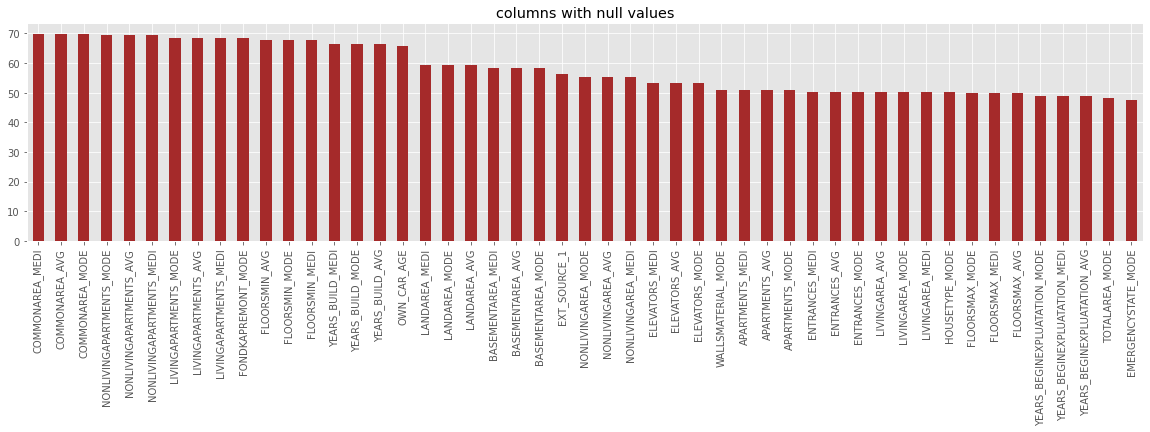

In [25]:
plt.figure(figsize=(20,4))
remove_cols.plot(kind ="bar",color="brown")
plt.title("columns with null values")
plt.show()

#### ii.Remove all columns with null values > 45%

In [26]:
perc_null=(ad.isnull().sum().sort_values(ascending = False)/len(ad))*100

In [27]:
perc_null

COMMONAREA_MEDI                 69.921398
COMMONAREA_AVG                  69.921398
COMMONAREA_MODE                 69.921398
NONLIVINGAPARTMENTS_MODE        69.429389
NONLIVINGAPARTMENTS_AVG         69.429389
NONLIVINGAPARTMENTS_MEDI        69.429389
LIVINGAPARTMENTS_MODE           68.453369
LIVINGAPARTMENTS_AVG            68.453369
LIVINGAPARTMENTS_MEDI           68.453369
FONDKAPREMONT_MODE              68.383368
FLOORSMIN_AVG                   67.789356
FLOORSMIN_MODE                  67.789356
FLOORSMIN_MEDI                  67.789356
YEARS_BUILD_MEDI                66.479330
YEARS_BUILD_MODE                66.479330
YEARS_BUILD_AVG                 66.479330
OWN_CAR_AGE                     65.901318
LANDAREA_MEDI                   59.443189
LANDAREA_MODE                   59.443189
LANDAREA_AVG                    59.443189
BASEMENTAREA_MEDI               58.399168
BASEMENTAREA_AVG                58.399168
BASEMENTAREA_MODE               58.399168
EXT_SOURCE_1                    56

In [28]:
remove_cols=list(perc_null[perc_null>=45].index)

In [29]:
remove_cols

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'HOUSETYPE_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATIO

In [30]:
ad.drop(remove_cols,axis=1,inplace=True)

In [31]:
ad.shape

(49999, 73)

In [32]:
# check remaining columns
ad.isnull().sum().sort_values(ascending=False)*100/len(ad)

OCCUPATION_TYPE                31.308626
EXT_SOURCE_3                   19.888398
AMT_REQ_CREDIT_BUREAU_YEAR     13.468269
AMT_REQ_CREDIT_BUREAU_QRT      13.468269
AMT_REQ_CREDIT_BUREAU_MON      13.468269
AMT_REQ_CREDIT_BUREAU_WEEK     13.468269
AMT_REQ_CREDIT_BUREAU_DAY      13.468269
AMT_REQ_CREDIT_BUREAU_HOUR     13.468269
NAME_TYPE_SUITE                 0.384008
OBS_30_CNT_SOCIAL_CIRCLE        0.336007
DEF_30_CNT_SOCIAL_CIRCLE        0.336007
OBS_60_CNT_SOCIAL_CIRCLE        0.336007
DEF_60_CNT_SOCIAL_CIRCLE        0.336007
EXT_SOURCE_2                    0.252005
AMT_GOODS_PRICE                 0.076002
AMT_ANNUITY                     0.002000
DAYS_LAST_PHONE_CHANGE          0.002000
CNT_FAM_MEMBERS                 0.002000
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

#### iii.Imputing missing Data--> Fill Remaining Columns Missing values 
#### 1) Numerical Columns

#### - Checking These columns as there all focused on AMT_REQ_CREDIT
##### AMT_REQ_CREDIT_BUREAU_YEAR     
##### AMT_REQ_CREDIT_BUREAU_QRT      
##### AMT_REQ_CREDIT_BUREAU_MON      
##### AMT_REQ_CREDIT_BUREAU_WEEK     
##### AMT_REQ_CREDIT_BUREAU_DAY      
##### AMT_REQ_CREDIT_BUREAU_HOUR     

In [33]:
ad["AMT_REQ_CREDIT_BUREAU_YEAR"].value_counts()

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     11754
1.0     10534
2.0      8059
3.0      5394
4.0      3374
5.0      1867
6.0      1114
7.0       617
8.0       354
9.0       173
11.0        8
10.0        4
12.0        4
13.0        2
16.0        2
15.0        2
25.0        1
23.0        1
14.0        1
Name: count, dtype: int64

In [34]:
ad["AMT_REQ_CREDIT_BUREAU_QRT"].value_counts()

AMT_REQ_CREDIT_BUREAU_QRT
0.0    35131
1.0     5452
2.0     2324
3.0      269
4.0       74
5.0        8
6.0        3
8.0        2
7.0        2
Name: count, dtype: int64

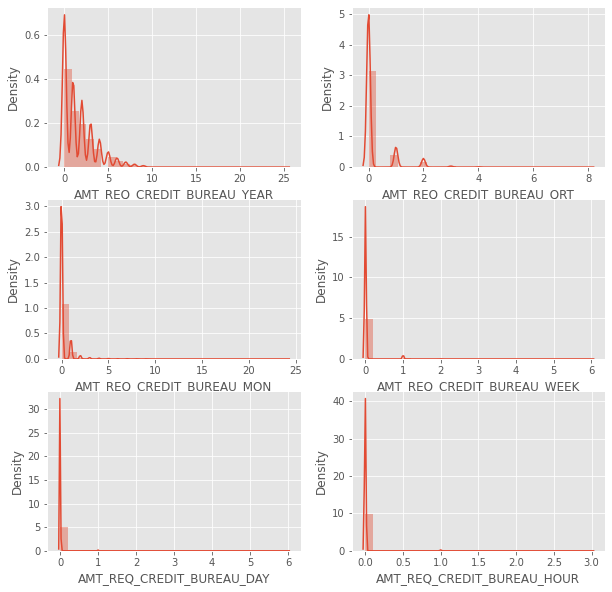

In [154]:
plt.figure( figsize=(10,10))
plt.subplot(3,2,1)
sns.distplot(ad["AMT_REQ_CREDIT_BUREAU_YEAR"],bins=30)
plt.subplot(3,2,2)
sns.distplot(ad["AMT_REQ_CREDIT_BUREAU_QRT"],bins=30)
plt.subplot(3,2,3)
sns.distplot(ad["AMT_REQ_CREDIT_BUREAU_MON"],bins=30)
plt.subplot(3,2,4)
sns.distplot(ad["AMT_REQ_CREDIT_BUREAU_WEEK"],bins=30)
plt.subplot(3,2,5)
sns.distplot(ad["AMT_REQ_CREDIT_BUREAU_DAY"],bins=30)
plt.subplot(3,2,6)
sns.distplot(ad["AMT_REQ_CREDIT_BUREAU_HOUR"],bins=30)
plt.show()


As these numerical columns are not continuos(Contains onlyinteger) we can fill the missing values by mode
TOP 2 value counts have a large difference with mode so fill by mode

In [36]:
l=["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON", 
   "AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR"]
for i in l:    
    ad[i]=ad[i].fillna(ad[i].mode()[0])

In [37]:
#Check null columns now
ad.isnull().sum().sort_values(ascending=False)*100/len(ad)

OCCUPATION_TYPE                31.308626
EXT_SOURCE_3                   19.888398
NAME_TYPE_SUITE                 0.384008
OBS_30_CNT_SOCIAL_CIRCLE        0.336007
DEF_30_CNT_SOCIAL_CIRCLE        0.336007
OBS_60_CNT_SOCIAL_CIRCLE        0.336007
DEF_60_CNT_SOCIAL_CIRCLE        0.336007
EXT_SOURCE_2                    0.252005
AMT_GOODS_PRICE                 0.076002
AMT_ANNUITY                     0.002000
CNT_FAM_MEMBERS                 0.002000
DAYS_LAST_PHONE_CHANGE          0.002000
FLAG_DOCUMENT_10                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_4                 0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_8                 0.000000
FLAG_DOCUMENT_9                 0.000000
SK_ID_CURR                      0.000000
FLAG_DOCUMENT_11                0.000000
FLAG_DOCUMENT_20                0.000000
AMT_REQ_CREDIT_B

#### B.AMT_ANNUITY

In [38]:
ad.AMT_ANNUITY.describe()

count     49998.000000
mean      27107.377355
std       14562.944435
min        2052.000000
25%       16456.500000
50%       24939.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

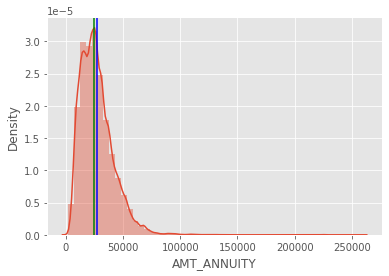

In [39]:
sns.distplot(ad["AMT_ANNUITY"])
plt.axvline(ad["AMT_ANNUITY"].mean(),color="blue")
plt.axvline(ad["AMT_ANNUITY"].median(),color="Green")
plt.show()

In [40]:
ad["AMT_ANNUITY"].skew()

1.6885259047667105

In [41]:
ad["AMT_ANNUITY"].value_counts()

AMT_ANNUITY
9000.0     1049
13500.0     896
6750.0      372
10125.0     336
37800.0     257
           ... 
80194.5       1
47871.0       1
14935.5       1
19539.0       1
70357.5       1
Name: count, Length: 8807, dtype: int64

In [42]:
ad["AMT_ANNUITY"]=ad["AMT_ANNUITY"].fillna(ad["AMT_ANNUITY"].median())

In [43]:
ad["AMT_ANNUITY"].isna().sum()

0

#### C.AMT_GOODS_PRICE

In [44]:
ad["AMT_GOODS_PRICE"].describe()

count    4.996100e+04
mean     5.390600e+05
std      3.698533e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

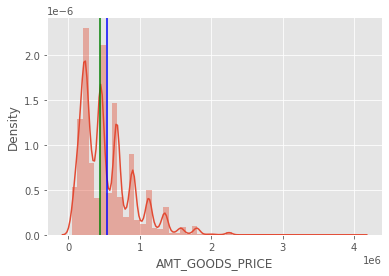

In [45]:
sns.distplot(ad["AMT_GOODS_PRICE"])
plt.axvline(ad["AMT_GOODS_PRICE"].median(),color="green")
plt.axvline(ad["AMT_GOODS_PRICE"].mean(),color="blue")
plt.show()

In [46]:
ad["AMT_GOODS_PRICE"].value_counts()

AMT_GOODS_PRICE
450000.0     4211
225000.0     4086
675000.0     4076
900000.0     2513
270000.0     1878
180000.0     1678
1125000.0    1476
454500.0     1426
135000.0     1275
315000.0      855
1350000.0     800
679500.0      791
238500.0      742
247500.0      737
360000.0      720
463500.0      648
540000.0      617
495000.0      566
90000.0       529
202500.0      525
405000.0      496
157500.0      448
472500.0      443
585000.0      429
337500.0      410
229500.0      392
112500.0      391
630000.0      370
1800000.0     345
688500.0      313
720000.0      312
1575000.0     289
477000.0      274
292500.0      270
810000.0      267
148500.0      254
67500.0       248
765000.0      234
283500.0      233
697500.0      232
904500.0      225
252000.0      222
382500.0      211
234000.0      205
855000.0      193
913500.0      192
45000.0       191
945000.0      190
1129500.0     175
328500.0      172
193500.0      163
459000.0      162
103500.0      161
702000.0      148
256500.0    

In [47]:
ad["AMT_GOODS_PRICE"].skew()

1.3478158088107373

Similar to AMT_ANNUITY, imputing NULLs with Median for AMT_GOODS_PRICE for similar reasons.

In [48]:
ad["AMT_GOODS_PRICE"]=ad["AMT_GOODS_PRICE"].fillna(ad["AMT_GOODS_PRICE"].median())

In [49]:
ad["AMT_GOODS_PRICE"].isna().sum()

0

###  iv.Fixing erroneous data
As seen already with the help of describe function, we know that we need to treat -ve values in days columns.

In [51]:
print(ad["DAYS_BIRTH"].unique())
print(ad["DAYS_EMPLOYED"].unique())
print(ad["DAYS_REGISTRATION"].unique())
print(ad["DAYS_ID_PUBLISH"].unique())
print(ad["DAYS_LAST_PHONE_CHANGE"].unique())

[ -9461 -16765 -19046 ... -15250 -22573 -13392]
[ -637 -1188  -225 ... -5112 -5680 -7860]
[ -3648  -1186  -4260 ... -17333 -11790 -10624]
[-2120  -291 -2531 ... -5913 -5645 -5543]
[-1134.  -828.  -815. ... -3279. -3343. -3125.]


In [52]:
#Creating list of negtive elements columns
erroneous_cols = [i for i in ad if i.startswith("DAYS")]
erroneous_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [53]:
ad[erroneous_cols]=abs(ad[erroneous_cols])

In [54]:
ad.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,49999.000000,49999.000000,49999.000000,4.999900e+04,4.999900e+04,49999.000000,4.999900e+04,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.00000,49999.000000,49999.000000,49998.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,4.987300e+04,40055.000000,49831.000000,49831.000000,49831.000000,49831.000000,49998.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.0,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.00000,49999.000000,49999.00000,49999.000000,49999.000000,49999.000000,49999.000000
mean,129013.210584,0.080522,0.419848,1.707676e+05,5.997006e+05,27107.333987,5.389923e+05,0.020798,16022.042081,67160.324386,4977.282666,2996.797176,0.999980,0.821476,0.199264,0.99798,0.277726,0.055661,2.158946,2.051661,2.030721,12.052561,0.015000,0.049921,0.039641,0.079962,0.232165,0.179704,5.138236e-01,0.511881,1.420782,0.141819,1.403664,0.098332,964.296172,0.000040,0.712254,0.000180,0.015700,0.086702,0.000220,0.080762,0.003680,0.000020,0.004260,0.0,0.003220,0.003160,0.000820,0.010020,0.000300,0.008500,0.000700,0.000520,0.00038,0.006140,0.00650,0.028021,0.233885,0.225825,1.627693
std,16690.512048,0.272102,0.724039,5.318191e+05,4.024154e+05,14562.802028,3.697208e+05,0.013761,4361.400270,138957.897110,3525.548305,1509.235410,0.004472,0.382957,0.399451,0.04490,0.447882,0.229268,0.911332,0.507978,0.502221,3.252584,0.121555,0.217784,0.195116,0.271236,0.422218,0.383944,1.911650e-01,0.194700,2.302086,0.440540,2.281782,0.357264,829.485574,0.006325,0.452717,0.013415,0.124315,0.281400,0.014831,0.272471,0.060552,0.004472,0.065131,0.0,0.056655,0.056126,0.028624,0.099599,0.017318,0.091805,0.026449,0.022798,0.01949,0.081625,0.10049,0.180876,0.868682,0.571627,1.849948
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2052.000000,4.500000e+04,0.000533,7680.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.170000e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,114570.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16456.500000,2.385000e+05,0.010006,12378.500000,933.000000,1998.000000,1722.000000,1.000000,1.000000,0.000000,1.00000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.917225e-01,0.370650,0.000000,0.000000

#### 2.Categorical Columns

#### 1.CODE_GENDER

In [56]:
ad.CODE_GENDER.value_counts()

CODE_GENDER
F      32823
M      17174
XNA        2
Name: count, dtype: int64

In [57]:
#Replace XNA with Mode
ad.CODE_GENDER=ad.CODE_GENDER.replace("XNA","F")

In [58]:
ad.CODE_GENDER.value_counts()

CODE_GENDER
F    32825
M    17174
Name: count, dtype: int64

#### 2.ORGANIZATION_TYPE

In [60]:
ad["ORGANIZATION_TYPE"].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    11101
XNA                        8924
Self-employed              6240
Other                      2717
Medicine                   1817
Government                 1716
Business Entity Type 2     1704
School                     1450
Trade: type 7              1210
Kindergarten               1090
Construction               1066
Business Entity Type 1      953
Transport: type 4           837
Trade: type 3               550
Security                    550
Industry: type 3            542
Industry: type 9            537
Industry: type 11           489
Housing                     489
Military                    458
Bank                        435
Transport: type 2           392
Agriculture                 392
Postal                      370
Police                      366
Security Ministries         331
Trade: type 2               307
Restaurant                  289
Services                    284
University                  222
Industry: type 7      

XNAs for ORGANIZATION_TYPE have 2nd highest count in the data. We must be very careful in imputing such a high number of XNAs with any value.

Since it is a categorical variable, and there won't be any aggregrate functions performed on this data, we don't necessarily need whole of the value to be imputed.

Thus, changing all XNAs with NULLs to protect the originality of data.

In [61]:
ad["ORGANIZATION_TYPE"]=ad["ORGANIZATION_TYPE"].replace("XNA",np.NaN)  # can use np.NaN or 0 

In [62]:
ad["ORGANIZATION_TYPE"]

0        Business Entity Type 3
1                        School
2                    Government
3        Business Entity Type 3
4                      Religion
                  ...          
49994                Restaurant
49995              Construction
49996    Business Entity Type 1
49997                     Other
49998                       NaN
Name: ORGANIZATION_TYPE, Length: 49999, dtype: object

In [63]:
ad["ORGANIZATION_TYPE"].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    11101
Self-employed              6240
Other                      2717
Medicine                   1817
Government                 1716
Business Entity Type 2     1704
School                     1450
Trade: type 7              1210
Kindergarten               1090
Construction               1066
Business Entity Type 1      953
Transport: type 4           837
Trade: type 3               550
Security                    550
Industry: type 3            542
Industry: type 9            537
Housing                     489
Industry: type 11           489
Military                    458
Bank                        435
Transport: type 2           392
Agriculture                 392
Postal                      370
Police                      366
Security Ministries         331
Trade: type 2               307
Restaurant                  289
Services                    284
University                  222
Industry: type 7            209
Transport: type 3     

## Task 2.  Identify Outliers in the Dataset

Outliers are data points that significantly differ from the majority of the data in a dataset. They can have a notable impact on data analysis and can potentially distort the results. 

In [156]:
ad.TARGET.value_counts()

TARGET
0    45973
1     4026
Name: count, dtype: int64

In [171]:
Income_outlier = ad.groupby('TARGET')['AMT_INCOME_TOTAL'].mean().to_frame().reset_index()

In [172]:
Income_outlier

,TARGET,AMT_INCOME_TOTAL
0,0,169053.150715
1,1,190344.823770


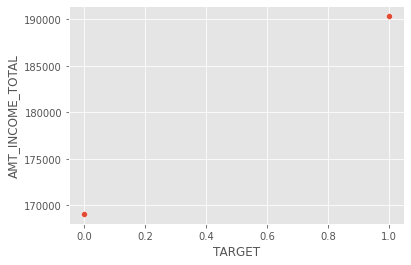

In [186]:
sns.scatterplot(data =Income_outlier,x ='TARGET', y= 'AMT_INCOME_TOTAL')
plt.show()

In [173]:
DAYS_EMPLOYED_outlier = ad.groupby('TARGET')['DAYS_EMPLOYED'].mean().to_frame().reset_index()

In [174]:
DAYS_EMPLOYED_outlier

,TARGET,DAYS_EMPLOYED
0,0,68906.820895
1,1,47217.034774


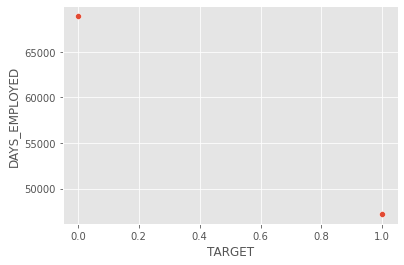

In [187]:
sns.scatterplot(data = DAYS_EMPLOYED_outlier,x ='TARGET', y= 'DAYS_EMPLOYED')
plt.show()

In [176]:
CNT_CHILDREN_outlier =ad.groupby('TARGET')['CNT_CHILDREN'].mean().to_frame().reset_index()

In [177]:
CNT_CHILDREN_outlier

,TARGET,CNT_CHILDREN
0,0,0.414200
1,1,0.484352


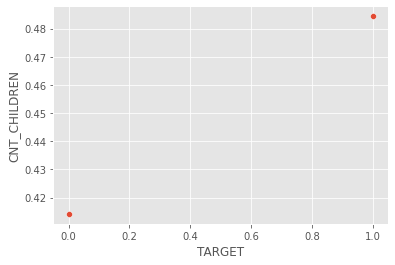

In [188]:
sns.scatterplot(data = CNT_CHILDREN_outlier,x ='TARGET', y= 'CNT_CHILDREN')
plt.show()

## Task 3. Analyze Data Imbalance

###  Adding new columns by Binning Continuous Variables
It is always a good practice to identify core or highly significant continuous fields in the data and then bin them into specific categories. It allows for an additional categorical analysis for such fields. We'll observe the use case of same later in this EDA exercise. For now, let's bin some of the continuous variables into 5 bins each as below -

#### a.Binning AMT_INCOME_TOTAL

In [64]:
#1. use describe to see what is the range or spread of income
ad.AMT_INCOME_TOTAL.describe()

count    4.999900e+04
mean     1.707676e+05
std      5.318191e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.458000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [65]:
# Using pd.qcut function to bin AMT_INCOME_TOTAL into 5 categories
ad["AMT_INCOME_RANGE"]=pd.qcut(ad.AMT_INCOME_TOTAL,q=[0,0.2,0.5,0.8,0.95,1],

labels=["VERY_LOW","LOW","MEDIUM","HIGH","VERY_HIGH"])

In [220]:
Income_count= ad["AMT_INCOME_RANGE"].value_counts().reset_index()
Income_count

,AMT_INCOME_RANGE,count
0,MEDIUM,17264
1,LOW,14611
2,VERY_LOW,10389
3,HIGH,5440
4,VERY_HIGH,2295


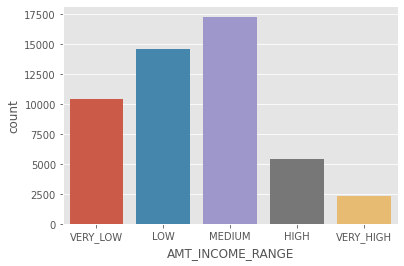

In [222]:
sns.barplot(data= Income_count, x= 'AMT_INCOME_RANGE', y= 'count')
plt.show()

#### b.Binning AMT_CREDIT

In [68]:
ad["AMT_CREDIT_RANGE"]=pd.qcut(ad["AMT_CREDIT"],q=[0,0.2,0.5,0.8,0.95,1],                               
    labels=["VERY_LOW","LOW","MEDIUM","HIGH","VERY_HIGH"])

In [215]:
Credit_range_count= ad["AMT_CREDIT_RANGE"].value_counts().reset_index()
Credit_range_count

,AMT_CREDIT_RANGE,count
0,MEDIUM,15319
1,LOW,14411
2,VERY_LOW,10599
3,HIGH,7379
4,VERY_HIGH,2291


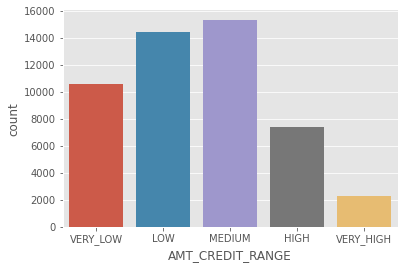

In [217]:
sns.barplot(data= Credit_range_count, x='AMT_CREDIT_RANGE', y= 'count')
plt.show()

#### c.Binning DAYS_BIRTH

In [71]:
ad["DAYS_BIRTH"]

0         9461
1        16765
2        19046
3        19005
4        19932
         ...  
49994    10667
49995    20211
49996    10280
49997    23485
49998    19251
Name: DAYS_BIRTH, Length: 49999, dtype: int64

In [72]:
ad["DAYS_BIRTH"]=(ad["DAYS_BIRTH"]/365).astype("int")

In [73]:
ad["DAYS_BIRTH"]

0        25
1        45
2        52
3        52
4        54
         ..
49994    29
49995    55
49996    28
49997    64
49998    52
Name: DAYS_BIRTH, Length: 49999, dtype: int32

In [74]:
ad["DAYS_BIRTH"].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66])

In [75]:
# Used pd.cut to give bins of ages
ad["DAYS_BIRTH_BINS"]=pd.cut(ad["DAYS_BIRTH"],bins=[19,25,35,60,100],
                              labels=["VERY_YOUNG","YOUNG","MIDDLE_AGE","SENIOR_CITIZEN"])

In [211]:
count_Days_Birth_bins= ad["DAYS_BIRTH_BINS"].value_counts().reset_index()
count_Days_Birth_bins

,DAYS_BIRTH_BINS,count
0,MIDDLE_AGE,30136
1,YOUNG,12389
2,SENIOR_CITIZEN,4778
3,VERY_YOUNG,2696


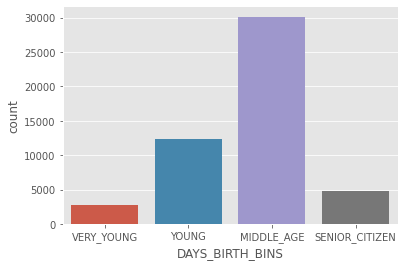

In [213]:
sns.barplot(data = count_Days_Birth_bins, x= 'DAYS_BIRTH_BINS', y= 'count')
plt.show()

#### d.Splitting Based on TARGET
Splitting data into 2 subsets based on Target Variable- Defaulter Data and Non-Defaulter Data.

This will help us with the comparison among 2 groups later

In [77]:
ad.TARGET.value_counts()

TARGET
0    45973
1     4026
Name: count, dtype: int64

In [200]:
# defaulter->1 , non-defaulter->0
count_Target= ((ad.TARGET.value_counts()*100)/len(ad)).reset_index()
count_Target

,TARGET,count
0,0,91.947839
1,1,8.052161


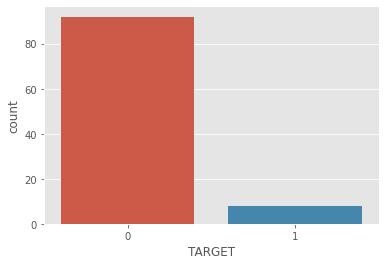

In [205]:
sns.barplot(data= count_Target, x= 'TARGET',y= "count")
plt.show()

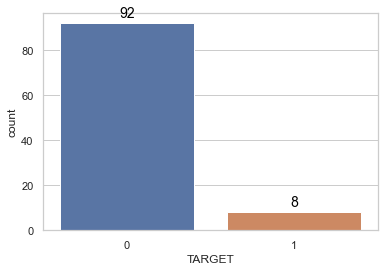

In [264]:

ax = sns.barplot(data=count_Target, x='TARGET', y='count')

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()


In [79]:
((ad.TARGET.value_counts()*100)/len(ad))[0]

91.94783895677914

In [81]:
defaulter=ad[ad["TARGET"]==1]
non_defaulter = ad[ad["TARGET"]==0]

In [82]:
print("defaulter_% - " ,round((defaulter.shape[0]*100/len(ad)),2))
print("non_defaulter_% - ",round((non_defaulter.shape[0]*100/len(ad)),2))

defaulter_% -  8.05
non_defaulter_% -  91.95


#### Percentage imbalance

In [84]:

round(defaulter["TARGET"].count()*100/ non_defaulter["TARGET"].count(),2) 

8.76

Medium imbalance

## Task 4. Perform Univariate, Segmented Univariate, and Bivariate Analysis

Perform Univariate, Segmented Univariate, and Bivariate Analysis
### A. Univariate Analysis
#### i . Qualitative Variables(Categorical data) 

#### a.Occupation Type

In [85]:
ad["OCCUPATION_TYPE"].value_counts()

OCCUPATION_TYPE
Laborers                 8952
Sales staff              5160
Core staff               4434
Managers                 3489
Drivers                  3044
High skill tech staff    1852
Accountants              1621
Medicine staff           1403
Security staff           1140
Cooking staff             963
Cleaning staff            739
Private service staff     447
Low-skill Laborers        357
Waiters/barmen staff      228
Secretaries               212
Realty agents             123
HR staff                  101
IT staff                   80
Name: count, dtype: int64

In [86]:
ad["OCCUPATION_TYPE"].value_counts().index

Index(['Laborers', 'Sales staff', 'Core staff', 'Managers', 'Drivers',
       'High skill tech staff', 'Accountants', 'Medicine staff',
       'Security staff', 'Cooking staff', 'Cleaning staff',
       'Private service staff', 'Low-skill Laborers', 'Waiters/barmen staff',
       'Secretaries', 'Realty agents', 'HR staff', 'IT staff'],
      dtype='object', name='OCCUPATION_TYPE')

In [87]:
ad["OCCUPATION_TYPE"].value_counts().values

array([8952, 5160, 4434, 3489, 3044, 1852, 1621, 1403, 1140,  963,  739,
        447,  357,  228,  212,  123,  101,   80], dtype=int64)

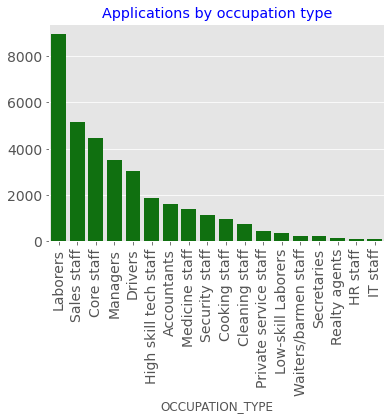

In [88]:
# Distribution of 'OCCUPATION_TYPE'
temp=ad["OCCUPATION_TYPE"].value_counts()
sns.barplot(x=temp.index,y=temp.values,color="green")
plt.xticks(rotation=90,size=14)
plt.yticks(size=14)
plt.title("Applications by occupation type", color ="blue")
plt.show()

We can infer that most of the applications come for Labourers, Sales Staff and Core Staff.

#### b.Organization Type

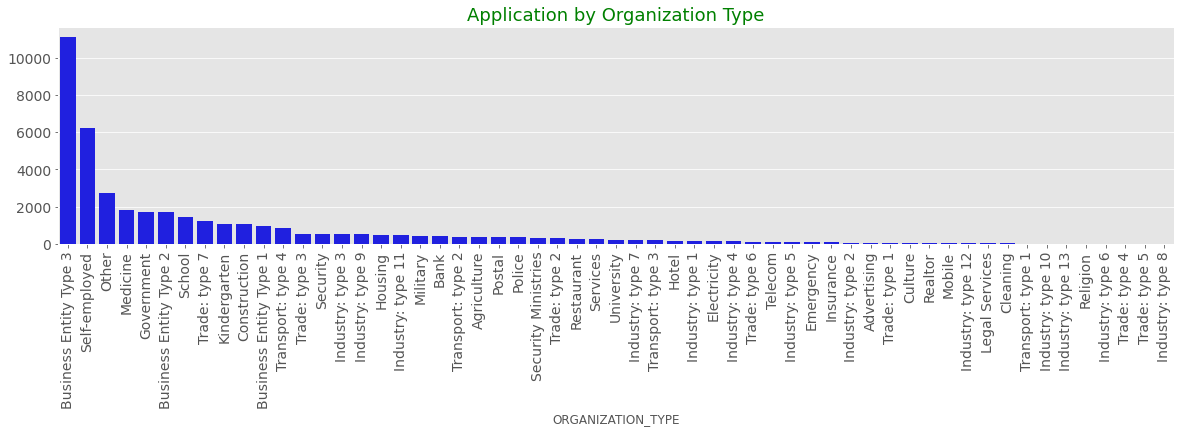

In [89]:
plt.figure(figsize=(20,4))
temp=ad["ORGANIZATION_TYPE"].value_counts()
sns.barplot(x=temp.index,y=temp.values,color="blue")
plt.xticks(rotation=90,size=14)
plt.yticks(size=14)
plt.title("Application by Organization Type",size=18,color="green")
plt.show()

It is observed that majority of the applicants belong to Business Entity Type 3 and Self Employed. 

#### c.Comparison of Gender Distribution among Defaulters and Non Defaulters

In [193]:
temp1=non_defaulter.CODE_GENDER.value_counts().reset_index()
temp2=defaulter.CODE_GENDER.value_counts().reset_index()
temp1,temp2

(  CODE_GENDER  count
 0           F  30561
 1           M  15412,
   CODE_GENDER  count
 0           F   2264
 1           M   1762)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


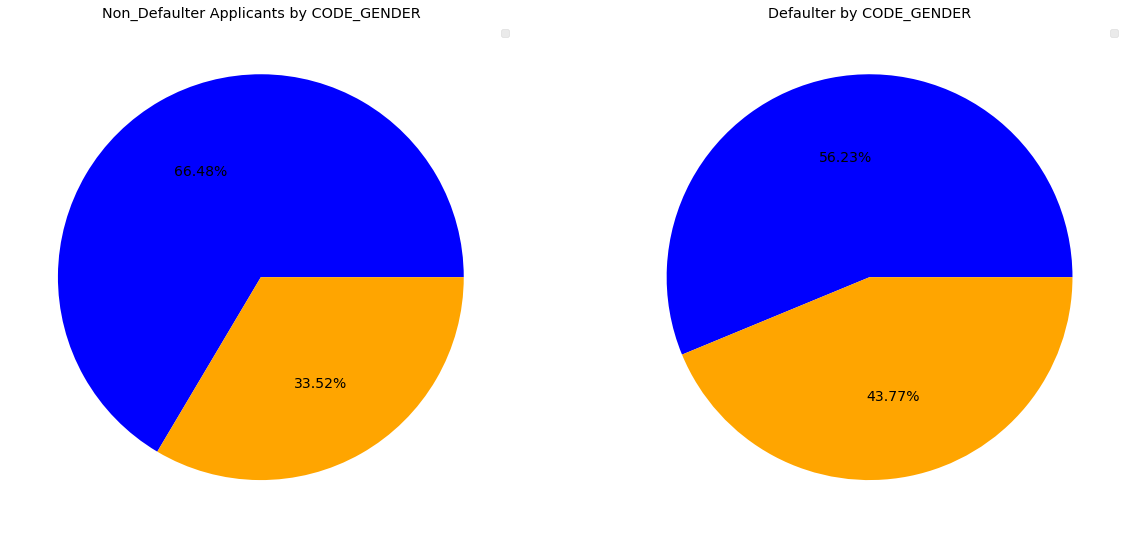

In [237]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
plt.pie(data=temp1, x='count', colors=["blue","orange"],autopct="%.2f%%",textprops={'fontsize': 14})
plt.legend()
plt.title("Non_Defaulter Applicants by CODE_GENDER")
plt.subplot(1,2,2)
plt.pie(data=temp2, x='count', colors=["blue","orange"],autopct="%.2f%%",textprops={'fontsize': 14})
plt.legend()
plt.title("Defaulter by CODE_GENDER")
plt.show()

Insights -

* Almost half of the Loan applications come from Working professionals.
* Working professionals contribute more than expected to loan defaults. The % split has increased from 51% to 61%

#### Converting above code into function For Reuse

In [248]:
def Univariate_comparision(ColName):
    
    colors = sns.color_palette('tab10')[0:5] 
    temp1=non_defaulter[ColName].value_counts()
    temp2=defaulter[ColName].value_counts()
    plt.figure(figsize=(20,12))
    plt.subplot(1,2,1)
    plt.pie(temp1.values,labels=temp1.index,colors=colors,autopct="%.2f%%",textprops={'fontsize': 14})
    plt.legend()
    plt.title("Non_Defaulter Applicants by" + str(ColName))
    plt.subplot(1,2,2)
    plt.pie(temp2.values,labels=temp2.index,colors=colors,autopct="%.2f%%",textprops={"fontsize":14})
    plt.legend()
    plt.title("Defaulter by" + str(ColName))
    plt.show()


#### d.Comparison of Income Type Distribution among Defaulters and Non Defaulters

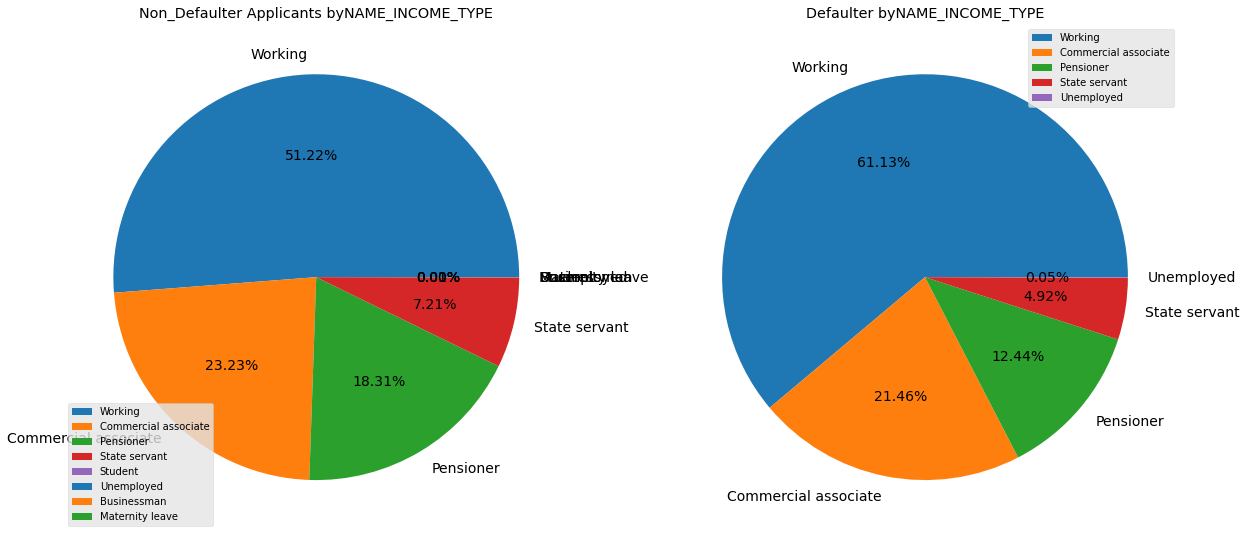

In [249]:
Univariate_comparision('NAME_INCOME_TYPE')

Insights -

* Almost half of the Loan applications come from Working professionals.
* Working professionals contribute more than expected to loan defaults. The % split has increased from 51% to 61%

#### e.Comparison of Family Status Distribution among Defaulters and Non Defaulters

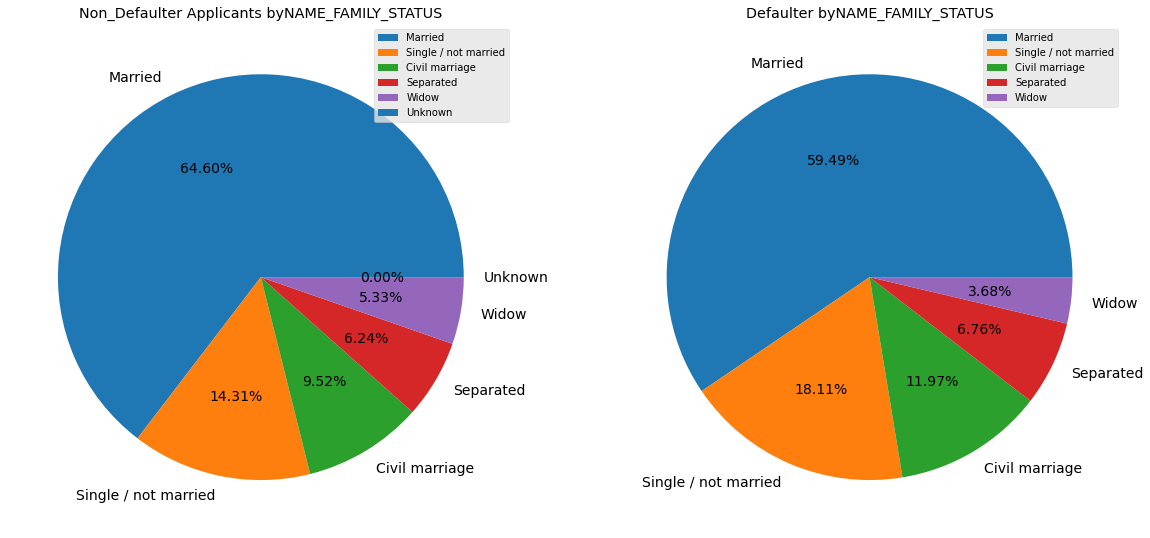

In [250]:
Univariate_comparision("NAME_FAMILY_STATUS")

Insights-
* 65 % of the Loan applicants are married.
* Family status doesn't seem to have any major impact on Loan deafults.

#### f.Comparison of Education Type Distribution among Defaulters and Non Defaulters

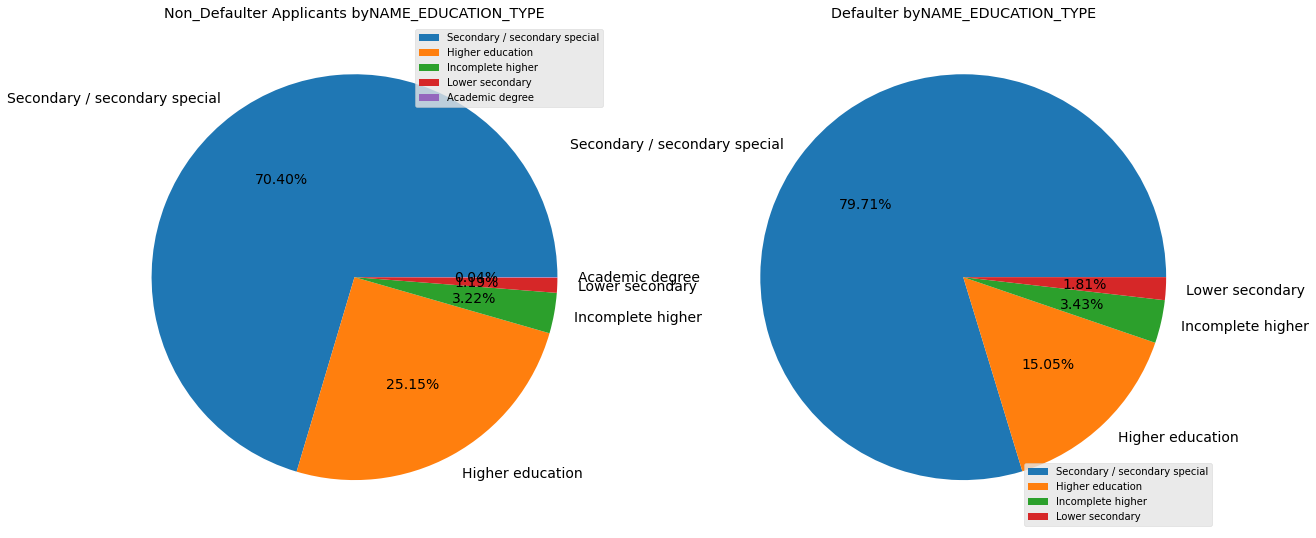

In [251]:
Univariate_comparision("NAME_EDUCATION_TYPE")

Insights-
* More than 2/3rds of Loan applicants have highest education as Secondary. 
* Secondary Education class contribute majorly ( more than expected too) for loan defaults.
* There is a considerable decrease in % split for loan defaults by people with higher education. ( from 25% to 16%)

#### g.Comparison of Housing Type Distribution among Defaulters and Non Defaulters

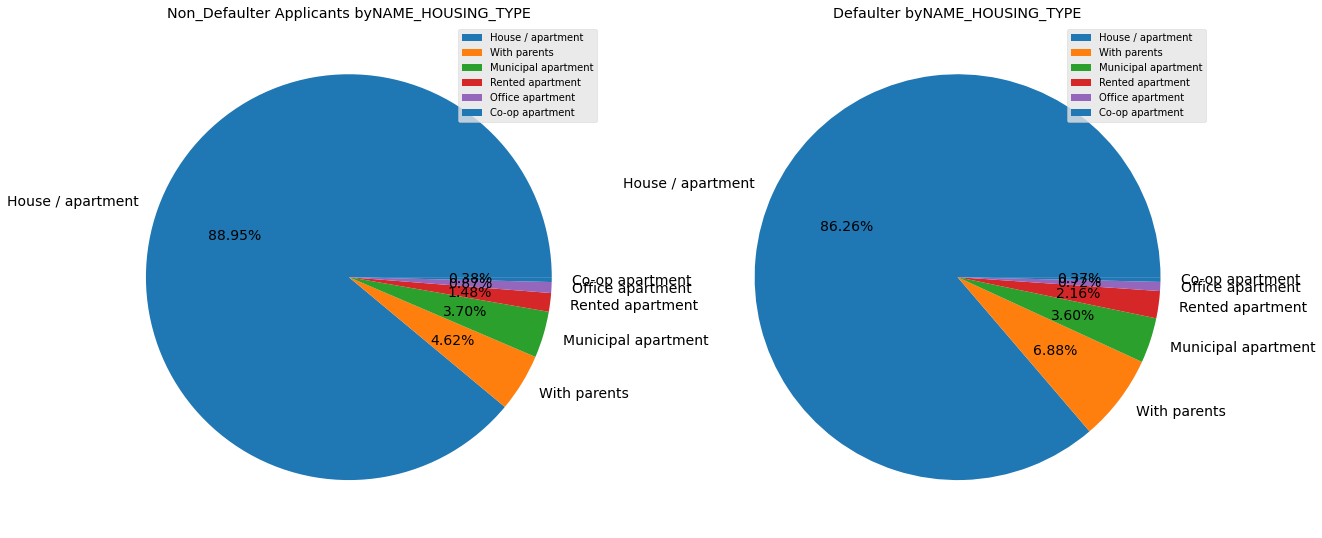

In [252]:
Univariate_comparision("NAME_HOUSING_TYPE")

Insights-
* Almost 90% of Loan applicants have their own home.
* Housing type doesn't play a significant role in determining whether there will be a loan defaulter. 

#### h.Comparison of Income Range Distribution among Defaulters and Non Defaulters

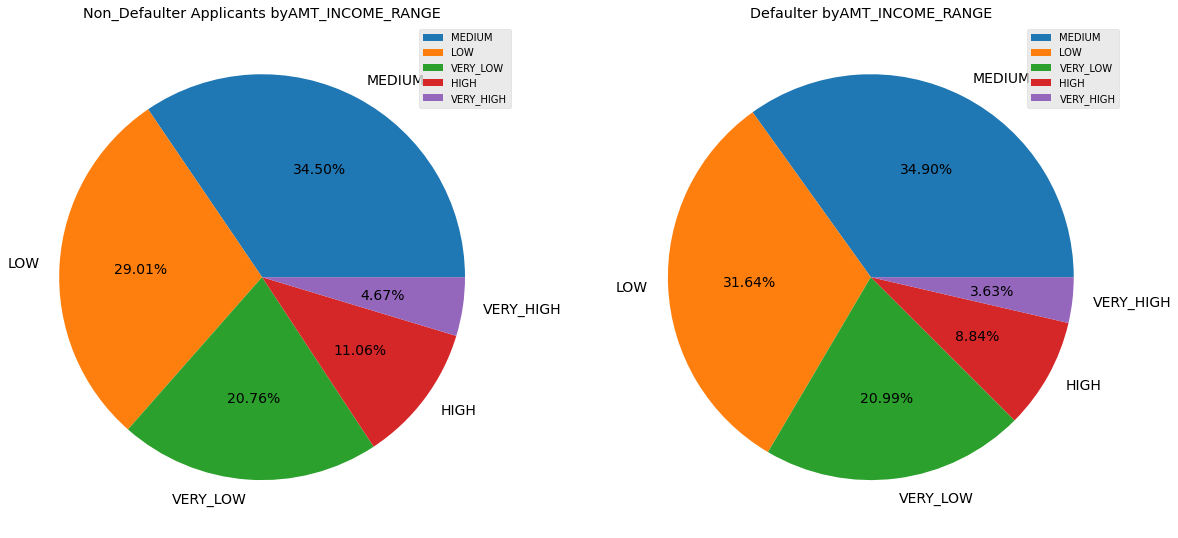

In [253]:
Univariate_comparision("AMT_INCOME_RANGE")

Insights-
* Here also, the % split is more or less unchanged for Defaulters. It suggests that Income doesn't play a significant role in loan defaults.

#### i.Comparison of Age Distribution among Defaulters and Non Defaulters

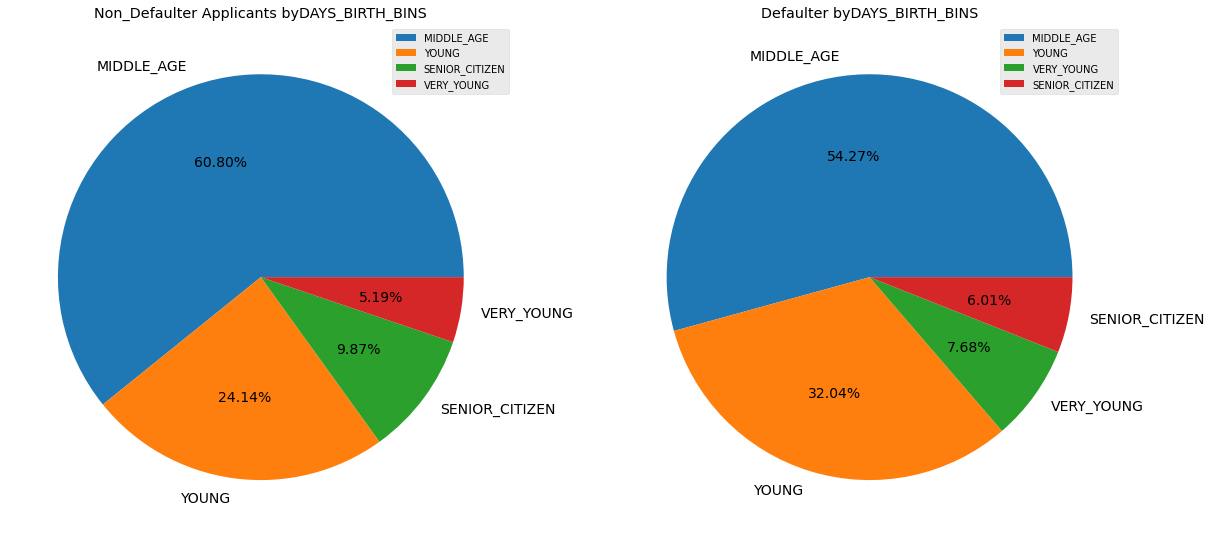

In [254]:
Univariate_comparision("DAYS_BIRTH_BINS")

Insights - 
* There is a significant shift in % split for Middle Age and Young applicants.
* Middle Aged applicants are contributing lesser to loan defaults
* Young applicants are more expected to default on a loan since there is a change in % aplit from 24% to 32%

#### j.Comparison of Loan Type Distribution among Defaulters and Non Defaulters

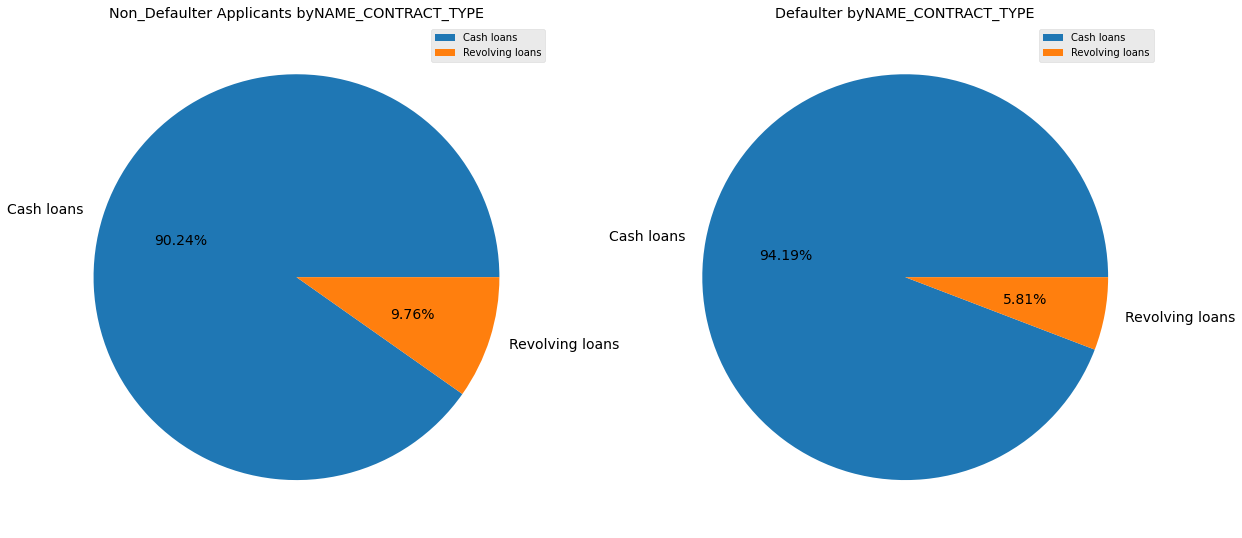

In [257]:
Univariate_comparision("NAME_CONTRACT_TYPE")

Insights-
* Cash loans are slightly more likely to be defaulted than revolving loans. 

#### k.Comparison of Accompany Type Distribution among Defaulters and Non Defaulters

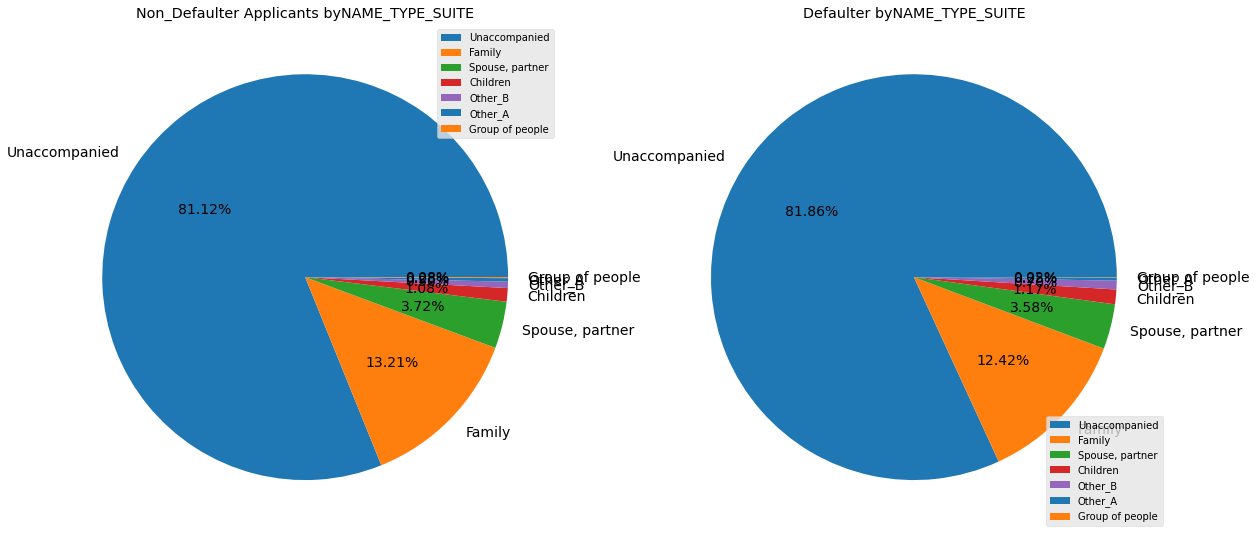

In [256]:
Univariate_comparision("NAME_TYPE_SUITE")

 Insights-
* Majority of loans are applied by single occupants
* This parameter doesn't have any impact on loan defaults as the % split is unchanged in both cases.

#### Univariate Analysis - ii . Quantitative Variables(Numerical data) 

In [109]:
def Univariate_comparision_cat(ColName):
    plt.figure(figsize=(20,12))
    plt.subplot(2,2,1)
    sns.distplot(non_defaulter[ColName],bins=30,color="Green",kde=True)                                                                                         
    plt.title("Non_Defaulter Applicants by" + str(ColName))
    plt.subplot(2,2,2)
    sns.distplot(defaulter[ColName],bins=30,color="Green",kde=True)                                                                                         
    plt.title("Defaulter Applicants by" + str(ColName))
    plt.subplot(2,2,3)
    sns.boxplot(non_defaulter[ColName],orient="h",palette="rainbow")                                                                                         
    plt.title("Non_Defaulter Applicants by" + str(ColName))
    plt.subplot(2,2,4)
    sns.boxplot(defaulter[ColName],orient="h",palette="rainbow")                                                                                          
    plt.title("Defaulter Applicants by" + str(ColName))
    plt.show()

#### 1.AMT_ANNUITY 

KeyError: 0

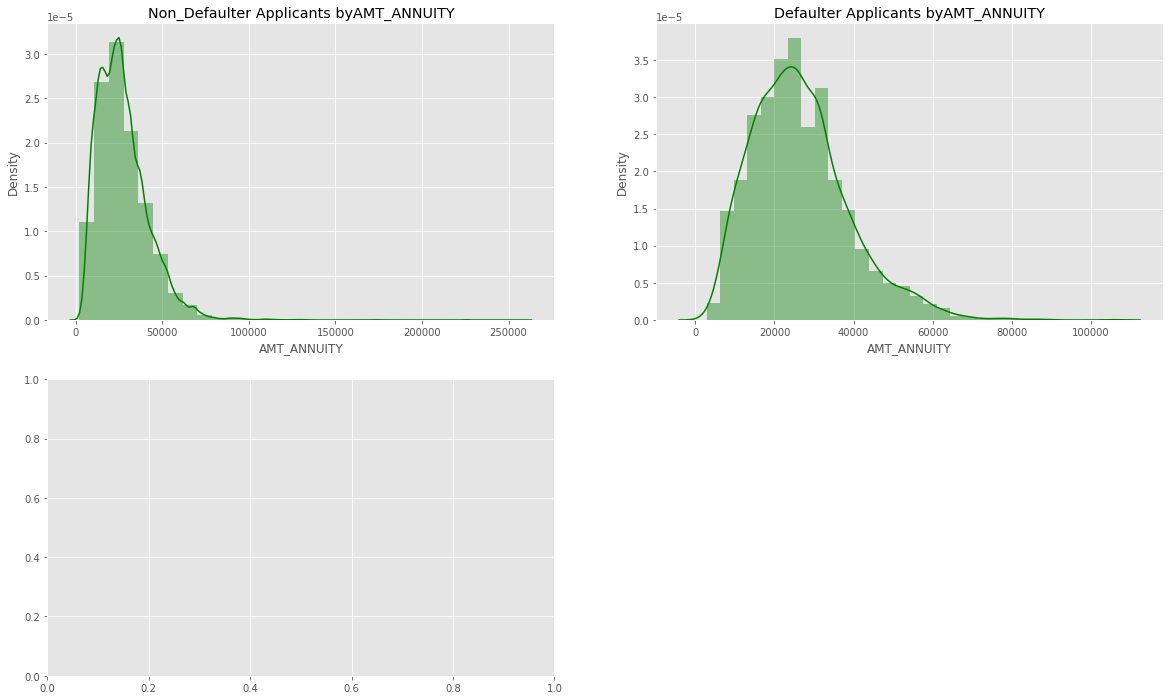

In [110]:
Univariate_comparision_cat("AMT_ANNUITY")

Insights - 
* Applicants with lower Annuity Amount are slightly more likely to default on a loan.
* Majority of Loan applicants come from 1st quartile of Annuity data ( Low salary people )

#### 2.AMT_CREDIT

KeyError: 0

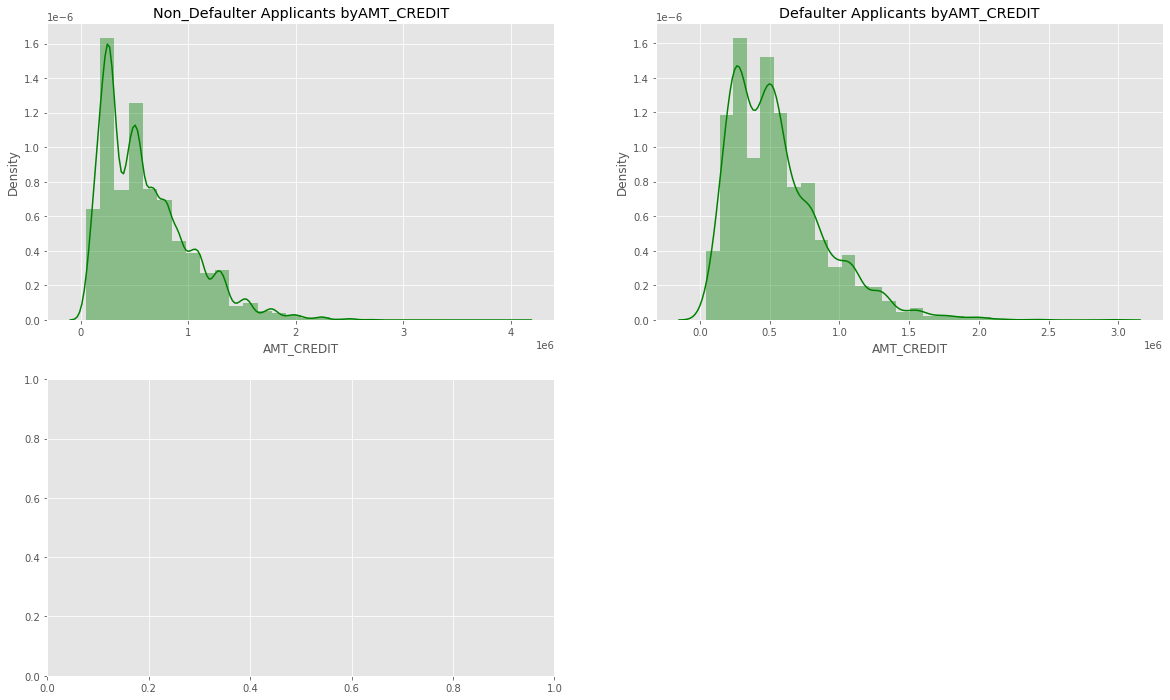

In [111]:
Univariate_comparision_cat("AMT_CREDIT")

Insights-
* Loan Amount doesn't seem to have any correlation with Loan defaults. 

#### 3.AMT_GOODS_PRICE

KeyError: 0

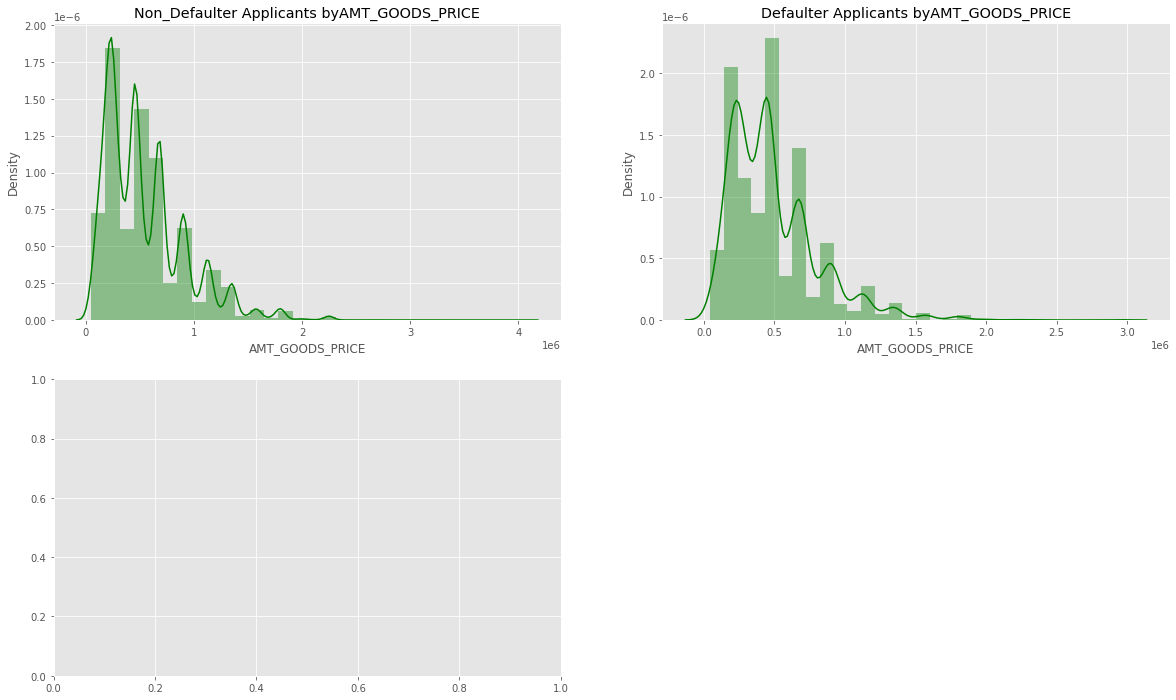

In [112]:
Univariate_comparision_cat("AMT_GOODS_PRICE")

Insights-
* The distribution are almost unchanged for Defaulters and Non Defaulters, hence we can say that Goods Price doesn't impact the chance of a loan default.

### B. Bivariate & Multivariate Analysis

#### A. Analysis of AMT_INCOME_RANGE, AMT_CREDIT & NAME_FAMILY_STATUS

In [115]:
def multivariate(col1,col2,col3):
    plt.figure(figsize=(25,12))
    plt.subplot(1,2,1)
    sns.boxplot(x=col1,y=col2,data=non_defaulter,hue=col3,palette="rainbow")
    plt.title("loan amount by AMT_CREDIT and NAME_FAMILY_STATUS(non_defaulter)",size=14)
    plt.subplot(1,2,2)
    sns.boxplot(x=col1,y=col2,data=defaulter,hue=col3,palette="rainbow")
    plt.title("loan amount by AMT_CREDIT and NAME_FAMILY_STATUS(defaulter)",size=14)
    plt.show()

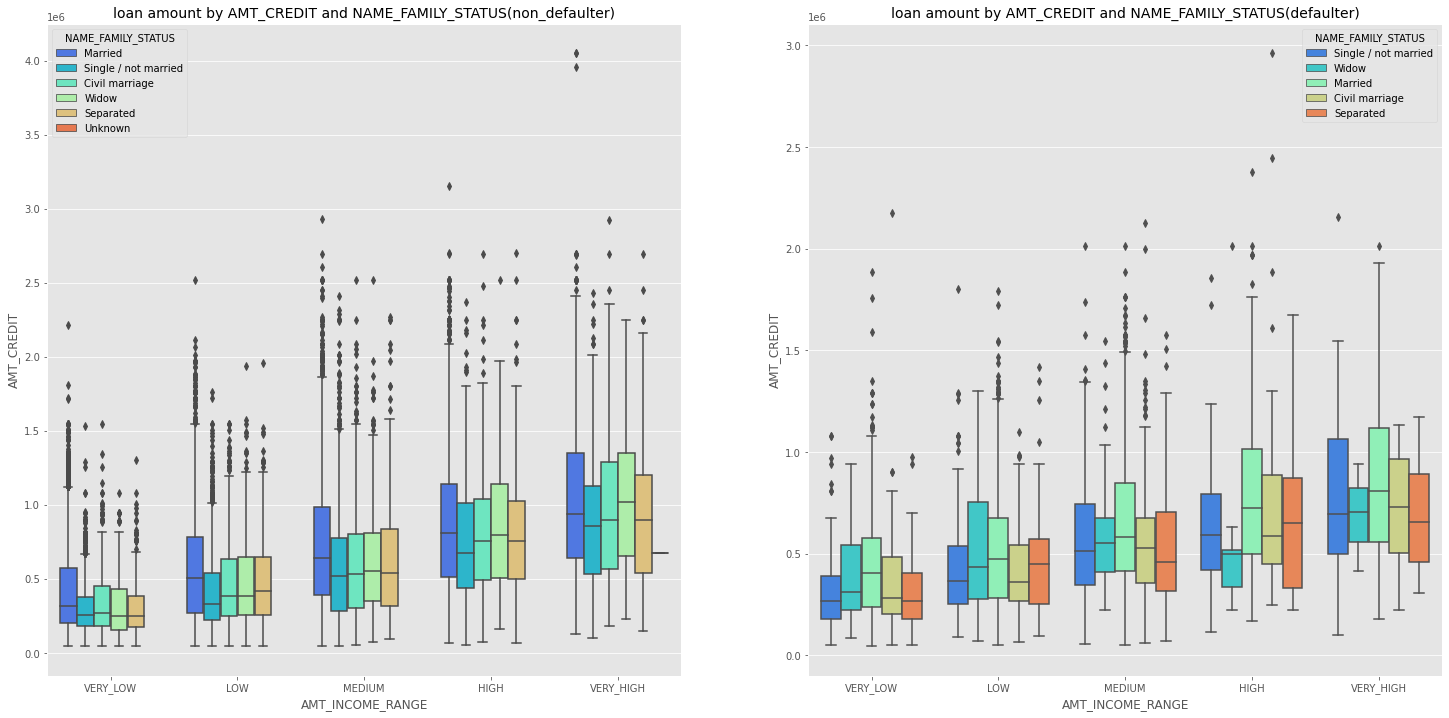

In [116]:
multivariate("AMT_INCOME_RANGE", "AMT_CREDIT","NAME_FAMILY_STATUS")

Insights-
* With increase in Income range, the loan amount increases proportionally.
* On family status axis, we observe that Married applicants have higher loan amount than others.


#### B. Analysis of NAME_EDUCATION_TYPE, AMT_CREDIT & NAME_FAMILY_STATUS

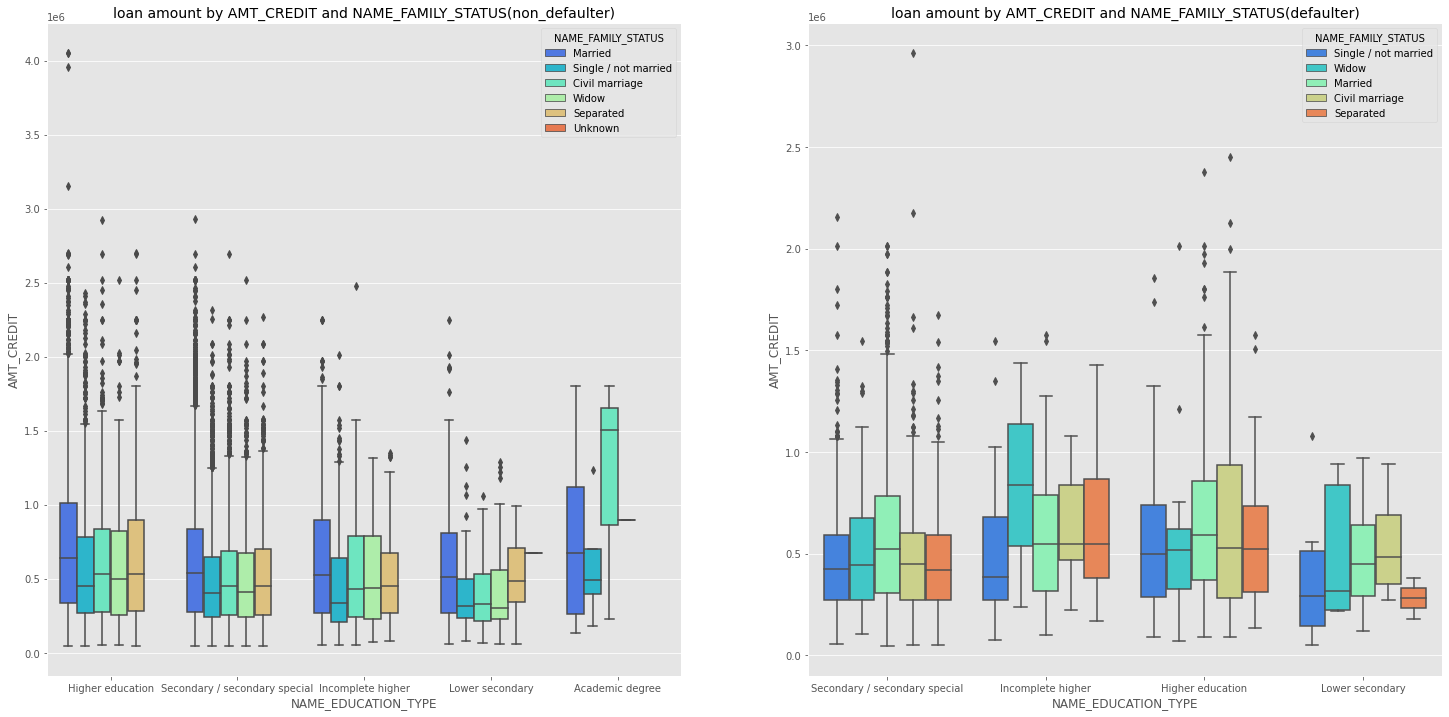

In [117]:
multivariate("NAME_EDUCATION_TYPE", "AMT_CREDIT","NAME_FAMILY_STATUS")

Insights-
* Higher the education, lesser is the likelihood of a loan default
* Among different family status, married ones have the highest likelihood of loan default

## Task 5. Identify Top Correlations for Different Scenarios

### Drilldown Analysis
Here we'll look for % defaulters within different classes in a particular variable.

In [118]:
ad[["AMT_INCOME_RANGE","TARGET"]].groupby(by=["AMT_INCOME_RANGE"]).count().sort_values(by=["TARGET"],ascending=False)

,TARGET
AMT_INCOME_RANGE,
MEDIUM,17264
LOW,14611
VERY_LOW,10389
HIGH,5440
VERY_HIGH,2295


In [119]:
total=ad[["AMT_INCOME_RANGE","TARGET"]].groupby(by=["AMT_INCOME_RANGE"]).count()
defaulter1=defaulter[["AMT_INCOME_RANGE","TARGET"]].groupby(by=["AMT_INCOME_RANGE"]).count()

In [120]:
total

,TARGET
AMT_INCOME_RANGE,
VERY_LOW,10389
LOW,14611
MEDIUM,17264
HIGH,5440
VERY_HIGH,2295


In [121]:
total.index

CategoricalIndex(['VERY_LOW', 'LOW', 'MEDIUM', 'HIGH', 'VERY_HIGH'], categories=['VERY_LOW', 'LOW', 'MEDIUM', 'HIGH', 'VERY_HIGH'], ordered=True, dtype='category', name='AMT_INCOME_RANGE')

In [122]:
total.TARGET

AMT_INCOME_RANGE
VERY_LOW     10389
LOW          14611
MEDIUM       17264
HIGH          5440
VERY_HIGH     2295
Name: TARGET, dtype: int64

In [123]:
defaulter1

,TARGET
AMT_INCOME_RANGE,
VERY_LOW,845
LOW,1274
MEDIUM,1405
HIGH,356
VERY_HIGH,146


#### Defining function for drilldown analysis

In [124]:
def perc_defaulters(col):
    plt.figure(figsize=(25,8))
    total=ad[[col,"TARGET"]].groupby(by=[col]).count()
    defaulter1=defaulter[[col,"TARGET"]].groupby(by=[col]).count()
    perc=defaulter1*100/total
    plt.subplot(1,2,1)
    sns.barplot(x=total.index,y=total.TARGET,color="blue",order=total.sort_values(by=["TARGET"],ascending=False).index)
    plt.title("Application count by " + str(col))
    plt.xticks(rotation =45)
    plt.subplot(1,2,2)
    sns.barplot(x=perc.index,y=perc.TARGET,color="Red",order=perc.sort_values(by=["TARGET"],ascending=False).index)
    plt.title("default % by " + str(col))
    plt.xticks(rotation =45)
    plt.show()

#### a.Drilldown analysis of AMT_INCOME_RANGE


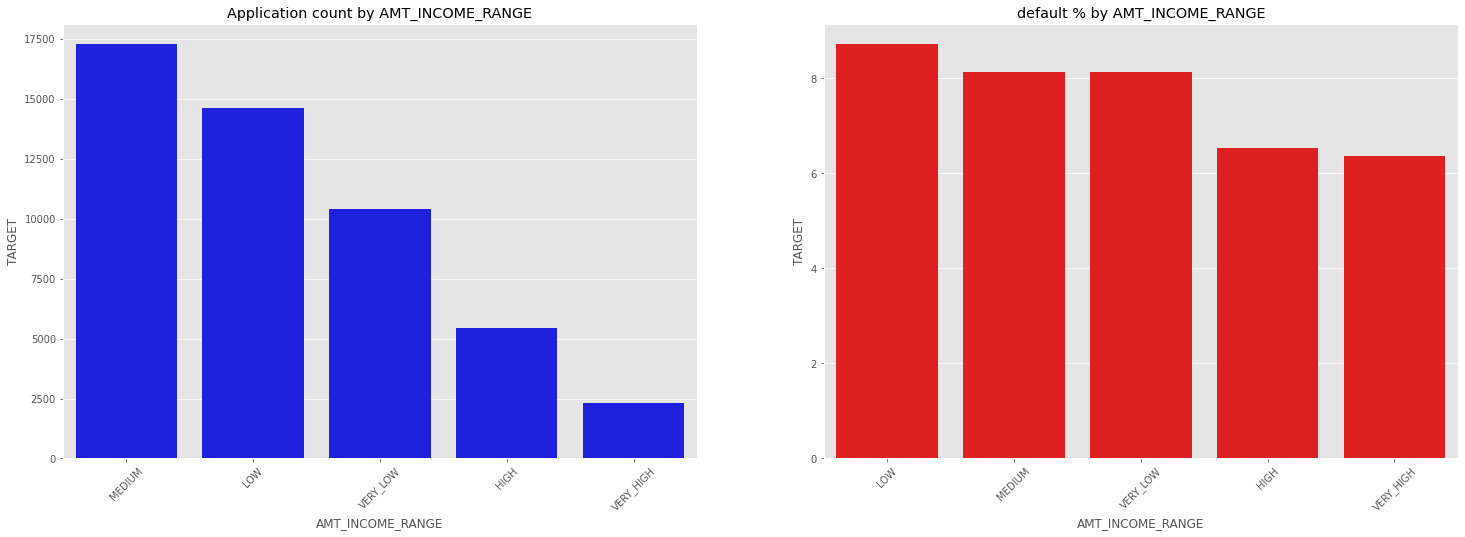

In [125]:
perc_defaulters("AMT_INCOME_RANGE")

Insights-
* Median income range professionals have maximum applications in the data
* Low Income range have maximum % of loan defaults
* As the Income range increases, loan default probability decreases

#### b.Drilldown analysis of NAME_INCOME_TYPE

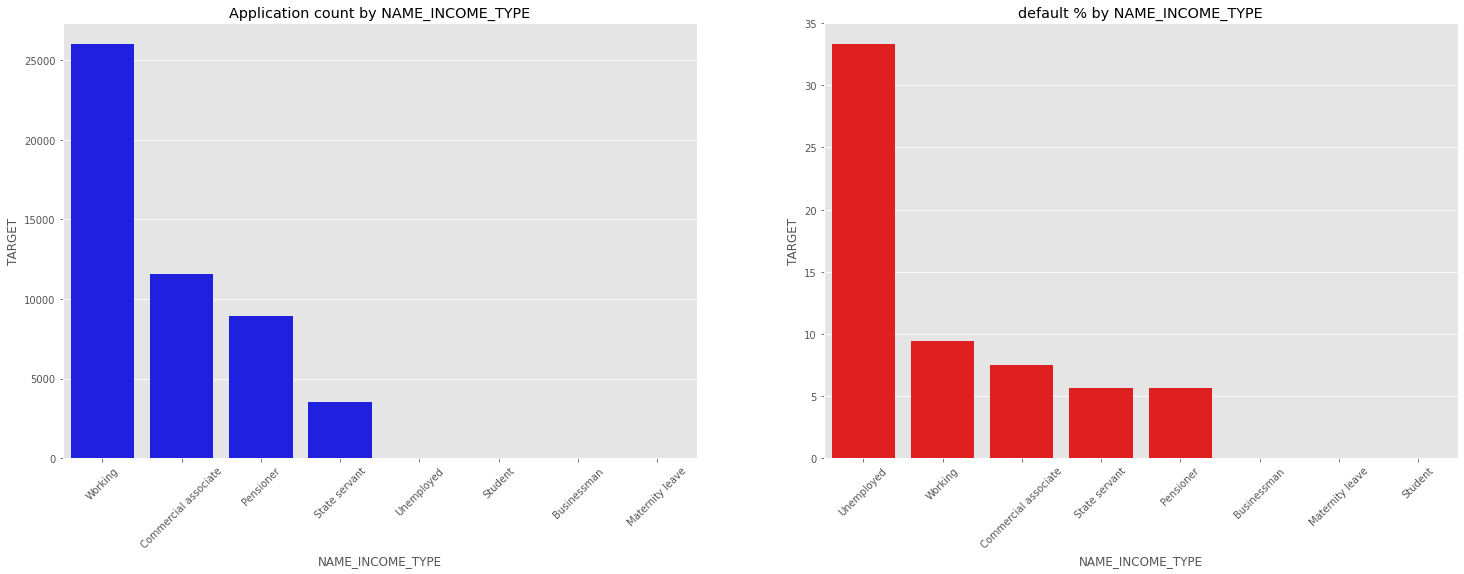

In [126]:
perc_defaulters('NAME_INCOME_TYPE')

Insights-
* Applicants on Maternity leave have a whopping 40% loan default rate
* The second to the list are Unemployed applicants with 35% loan defaults

#### c.Drilldown analysis of NAME_CONTRACT_TYPE

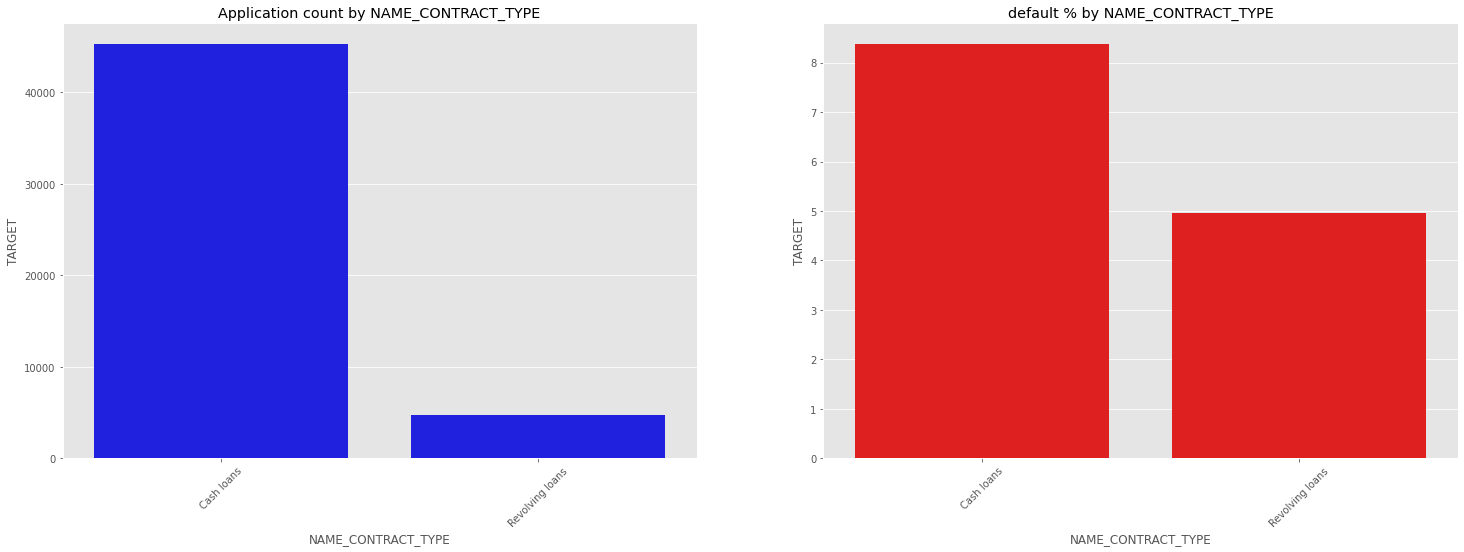

In [127]:
perc_defaulters('NAME_CONTRACT_TYPE')

Insights-
* Majority of the loans are cash loans. Cash loans also have almost double probability of a loan default than revolving loans.

#### d.Drilldown analysis of NAME_EDUCATION_TYPE

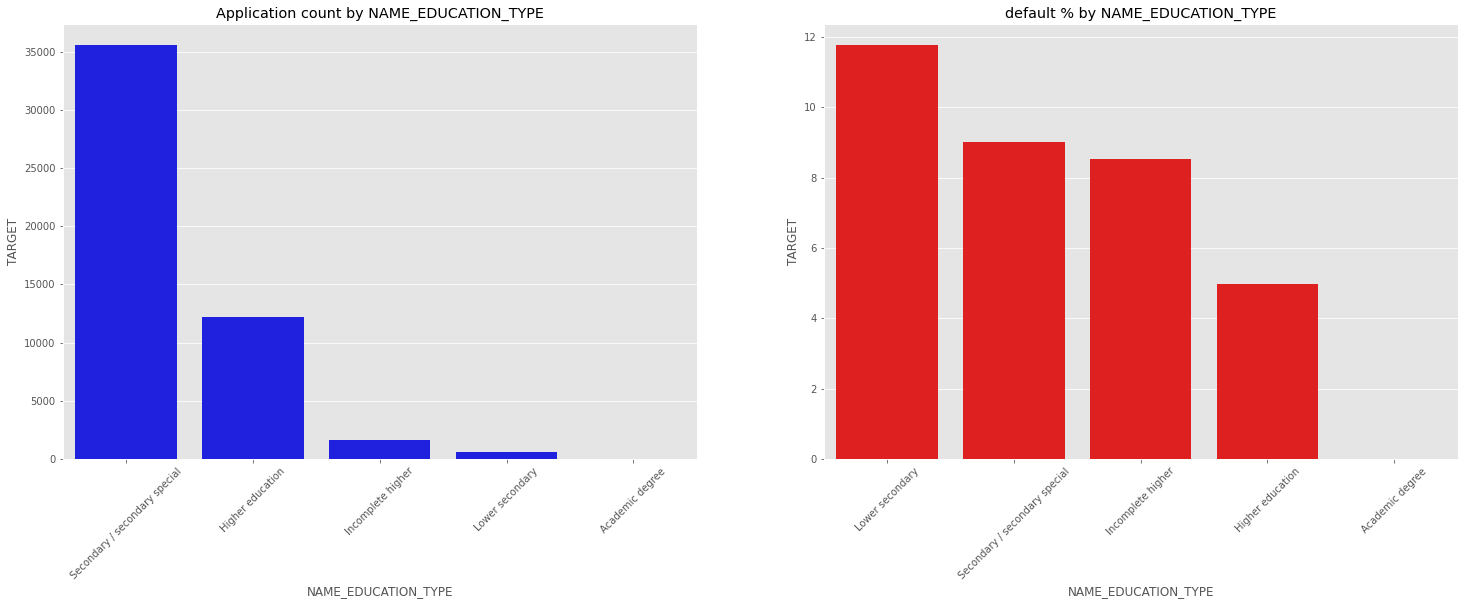

In [128]:
perc_defaulters('NAME_EDUCATION_TYPE')

Insights-
* Higher the education of an applicant, lesser the chance of loan default
* Lower secondary applicants have a concerning 11% loan default rate, but the count of applicants is low 
* The major concern is of Secondary education applicants. They have highest applicants and a significant 9% loan default rate as well.

#### e.Drilldown analysis of OCCUPATION_TYPE

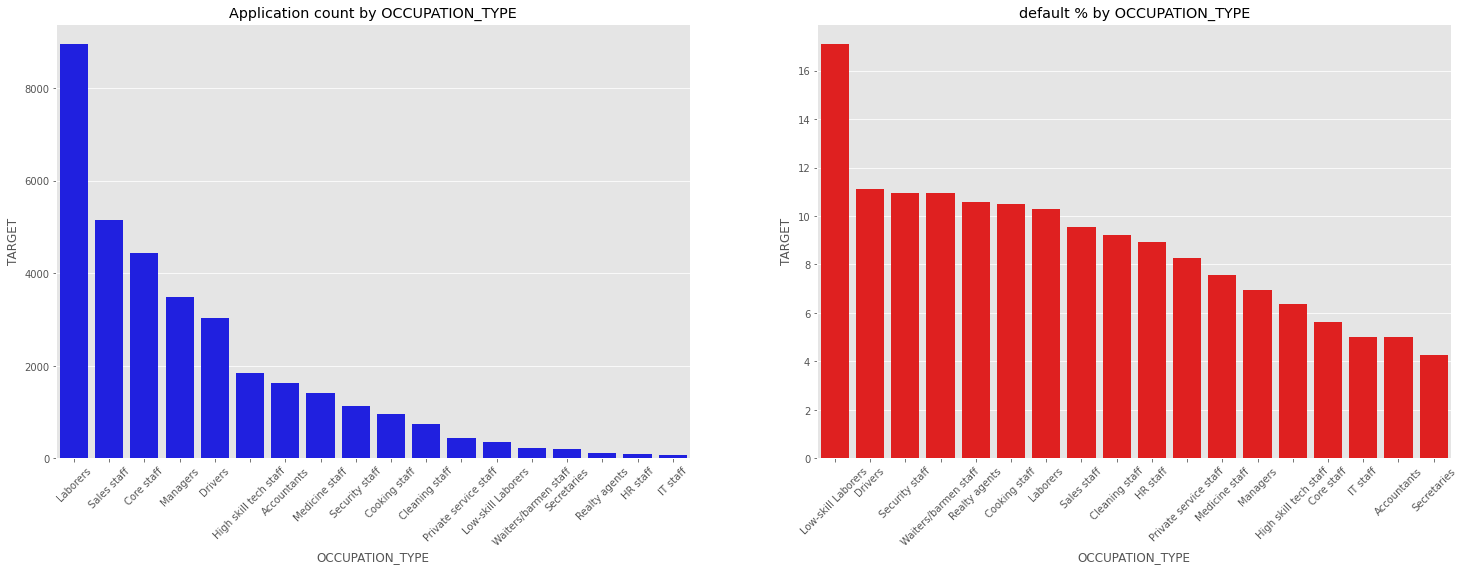

In [129]:
perc_defaulters('OCCUPATION_TYPE')

In [130]:
perc_defaulters=pd.pivot_table(ad ,values="TARGET", index=[ "CODE_GENDER","AMT_INCOME_RANGE"],
                               columns=["NAME_EDUCATION_TYPE"],aggfunc=np.mean )
perc_defaulters*100

NAME_EDUCATION_TYPE           Academic degree  Higher education  \
CODE_GENDER AMT_INCOME_RANGE                                      
F           VERY_LOW                      0.0          5.081826   
            LOW                           0.0          4.655327   
            MEDIUM                        0.0          4.810883   
            HIGH                          0.0          3.271812   
            VERY_HIGH                     0.0          3.709949   
M           VERY_LOW                      0.0          6.250000   
            LOW                           0.0          6.376812   
            MEDIUM                        0.0          6.750000   
            HIGH                          0.0          4.602992   
            VERY_HIGH                     NaN          5.351682   

NAME_EDUCATION_TYPE           Incomplete higher  Lower secondary  \
CODE_GENDER AMT_INCOME_RANGE                                       
F           VERY_LOW                   4.444444         8.139535   
            LOW                        8.000000        11.382114   
            MEDIUM                     8.181818        11.764706   
            HIGH                       9.183673         0.000000   
            VERY_HIGH                  9.302326        16.666667   
M           VERY_LOW                  10.526316        11.864407   
            LOW                       10.791367        19.277108   
            MEDIUM                    10.370370        13.333333   
            HIGH                       9.174312        21.428571   
            VERY_HIGH                  7.936508         0.000000   

NAME_EDUCATION_TYPE           Secondary / secondary special  
CODE_GENDER AMT_INCOME_RANGE                                 
F           VERY_LOW                               7.682273  
            LOW                                    7.978157  
            MEDIUM                                 7.549650  
            HIGH                                   7.022107  
            VERY_HIGH                              6.378132  
M           VERY_LOW                              12.405358  
            LOW                                   13.049727  
            MEDIUM                                11.122106  
            HIGH                                   9.176030  
            VERY_HIGH                             10.429448

Insights - 

Categories with more than 9% default rate - 
* Females, High Income, Academic degree
* Male, Very Low income , Incomplete higher
* Male, Low Income , Incomplete higher
* Male, Medium Income , Incomplete higher
* Female, Low Income, Lower Secondary
* Female, Medium Income, Lower Secondary
* Male, Very Low Income, Lower Secondary
* Male, Low Income, Lower Secondary
* Male, Medium Income, Lower Secondary
* Male, {ALL INCOME RANGES} , Secondary


#### 8.Bivariate Analysis using Pairplot 

In [131]:
pairplor_data = ad[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','TARGET']]

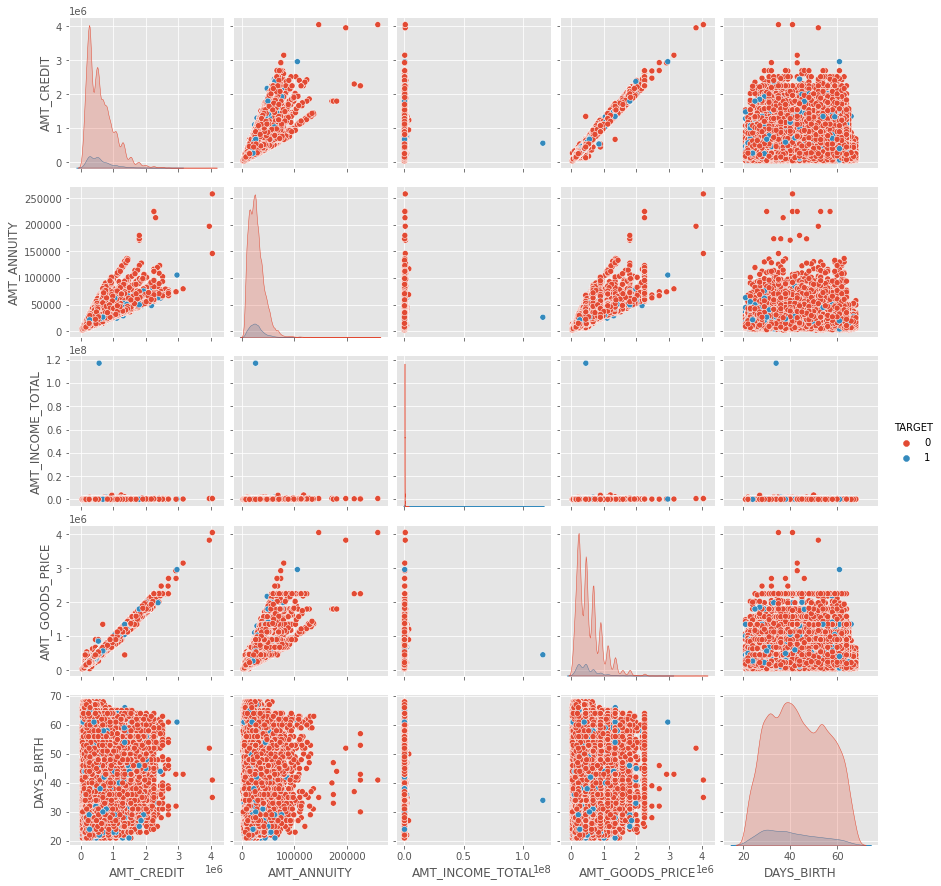

In [132]:
sns.pairplot(pairplor_data,hue="TARGET",diag_kind="kde")
plt.show()

Insights-

* AMT_CREDIT & AMT_GOODS_PRICE are correlated  ( With higher priced goods, loan amount is higher)
* AMT_ANNUITY & AMT_GOODS_PRICE are also correlated ( With higher annuity, expensive goods are purchased)
* AMT_ANNUITY & AMT_CREDIT are correlated (Higher the annuity,higher the loan amount)

With respect to TARGET - 
* Loan defaulters ( Blue ) are younger in age


#### 9.Correlation Check using Heatmap

In [133]:
# Data prep for heatmap
heatmap_data = ad[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH',
         'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
         'AMT_CREDIT',]]

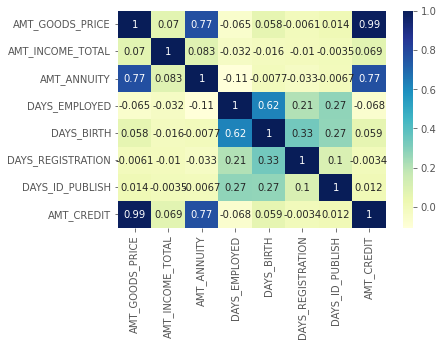

In [134]:
sns.heatmap(heatmap_data.corr(),annot=True,cmap="YlGnBu")
plt.show()

Insights-
* The heatmap confirms our correlation findings from pariplot

### 10.TOP 10 Correlation

In [135]:
corr_matrix=defaulter[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED',
  'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
  'AMT_CREDIT']].corr(method = 'pearson')                     # Getting Correaltion Matrix

corr_matrix

,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,AMT_CREDIT
AMT_GOODS_PRICE,1.000000,0.013270,0.749504,0.023182,0.140894,0.043320,0.049723,0.982268
AMT_INCOME_TOTAL,0.013270,1.000000,0.018005,-0.011759,-0.009117,0.009561,0.009122,0.015271
AMT_ANNUITY,0.749504,0.018005,1.000000,-0.078114,0.008625,-0.021582,0.021321,0.749665
DAYS_EMPLOYED,0.023182,-0.011759,-0.078114,1.000000,0.588275,0.192436,0.232662,0.018782
DAYS_BIRTH,0.140894,-0.009117,0.008625,0.588275,1.000000,0.288426,0.247502,0.142434
DAYS_REGISTRATION,0.043320,0.009561,-0.021582,0.192436,0.288426,1.000000,0.090291,0.042844
DAYS_ID_PUBLISH,0.049723,0.009122,0.021321,0.232662,0.247502,0.090291,1.000000,0.043772
AMT_CREDIT,0.982268,0.015271,0.749665,0.018782,0.142434,0.042844,0.043772,1.000000


In [136]:
np.ones(corr_matrix.shape)

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

In [137]:
# traingle lower - tril
np.tril(np.ones(corr_matrix.shape),k=1)

array([[1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

In [138]:
# traingle upper - triu
np.triu(np.ones(corr_matrix.shape),k=1)

array([[0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [139]:
corr_matrix=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
corr_matrix

,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,AMT_CREDIT
AMT_GOODS_PRICE,NaN,0.01327,0.749504,0.023182,0.140894,0.043320,0.049723,0.982268
AMT_INCOME_TOTAL,NaN,NaN,0.018005,-0.011759,-0.009117,0.009561,0.009122,0.015271
AMT_ANNUITY,NaN,NaN,NaN,-0.078114,0.008625,-0.021582,0.021321,0.749665
DAYS_EMPLOYED,NaN,NaN,NaN,NaN,0.588275,0.192436,0.232662,0.018782
DAYS_BIRTH,NaN,NaN,NaN,NaN,NaN,0.288426,0.247502,0.142434
DAYS_REGISTRATION,NaN,NaN,NaN,NaN,NaN,NaN,0.090291,0.042844
DAYS_ID_PUBLISH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043772
AMT_CREDIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
corr_matrix.unstack()

AMT_GOODS_PRICE    AMT_GOODS_PRICE           NaN
                   AMT_INCOME_TOTAL          NaN
                   AMT_ANNUITY               NaN
                   DAYS_EMPLOYED             NaN
                   DAYS_BIRTH                NaN
                   DAYS_REGISTRATION         NaN
                   DAYS_ID_PUBLISH           NaN
                   AMT_CREDIT                NaN
AMT_INCOME_TOTAL   AMT_GOODS_PRICE      0.013270
                   AMT_INCOME_TOTAL          NaN
                   AMT_ANNUITY               NaN
                   DAYS_EMPLOYED             NaN
                   DAYS_BIRTH                NaN
                   DAYS_REGISTRATION         NaN
                   DAYS_ID_PUBLISH           NaN
                   AMT_CREDIT                NaN
AMT_ANNUITY        AMT_GOODS_PRICE      0.749504
                   AMT_INCOME_TOTAL     0.018005
                   AMT_ANNUITY               NaN
                   DAYS_EMPLOYED             NaN
                   D

In [141]:
corr_matrix_df=corr_matrix.unstack().reset_index()
corr_matrix_df

,level_0,level_1,0
0,AMT_GOODS_PRICE,AMT_GOODS_PRICE,NaN
1,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,NaN
2,AMT_GOODS_PRICE,AMT_ANNUITY,NaN
3,AMT_GOODS_PRICE,DAYS_EMPLOYED,NaN
4,AMT_GOODS_PRICE,DAYS_BIRTH,NaN
5,AMT_GOODS_PRICE,DAYS_REGISTRATION,NaN
6,AMT_GOODS_PRICE,DAYS_ID_PUBLISH,NaN
7,AMT_GOODS_PRICE,AMT_CREDIT,NaN
8,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,0.013270
9,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,NaN


In [142]:
corr_matrix_df.columns=["var1","var2","Corr"]
corr_matrix_df

,var1,var2,Corr
0,AMT_GOODS_PRICE,AMT_GOODS_PRICE,NaN
1,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,NaN
2,AMT_GOODS_PRICE,AMT_ANNUITY,NaN
3,AMT_GOODS_PRICE,DAYS_EMPLOYED,NaN
4,AMT_GOODS_PRICE,DAYS_BIRTH,NaN
5,AMT_GOODS_PRICE,DAYS_REGISTRATION,NaN
6,AMT_GOODS_PRICE,DAYS_ID_PUBLISH,NaN
7,AMT_GOODS_PRICE,AMT_CREDIT,NaN
8,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,0.013270
9,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,NaN


In [143]:
corr_matrix_df.dropna(subset=["Corr"],inplace=True)

In [145]:
corr_matrix_df

,var1,var2,Corr
8,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,0.013270
16,AMT_ANNUITY,AMT_GOODS_PRICE,0.749504
17,AMT_ANNUITY,AMT_INCOME_TOTAL,0.018005
24,DAYS_EMPLOYED,AMT_GOODS_PRICE,0.023182
25,DAYS_EMPLOYED,AMT_INCOME_TOTAL,-0.011759
26,DAYS_EMPLOYED,AMT_ANNUITY,-0.078114
32,DAYS_BIRTH,AMT_GOODS_PRICE,0.140894
33,DAYS_BIRTH,AMT_INCOME_TOTAL,-0.009117
34,DAYS_BIRTH,AMT_ANNUITY,0.008625
35,DAYS_BIRTH,DAYS_EMPLOYED,0.588275


In [146]:
corr_matrix_df["Abs_Corr"] = abs(corr_matrix_df["Corr"])

corr_matrix_df

,var1,var2,Corr,Abs_Corr
8,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,0.013270,0.013270
16,AMT_ANNUITY,AMT_GOODS_PRICE,0.749504,0.749504
17,AMT_ANNUITY,AMT_INCOME_TOTAL,0.018005,0.018005
24,DAYS_EMPLOYED,AMT_GOODS_PRICE,0.023182,0.023182
25,DAYS_EMPLOYED,AMT_INCOME_TOTAL,-0.011759,0.011759
26,DAYS_EMPLOYED,AMT_ANNUITY,-0.078114,0.078114
32,DAYS_BIRTH,AMT_GOODS_PRICE,0.140894,0.140894
33,DAYS_BIRTH,AMT_INCOME_TOTAL,-0.009117,0.009117
34,DAYS_BIRTH,AMT_ANNUITY,0.008625,0.008625
35,DAYS_BIRTH,DAYS_EMPLOYED,0.588275,0.588275


In [147]:
Top10_corr=corr_matrix_df.sort_values(by=["Abs_Corr"],ascending=False).head(10)
Top10_corr

,var1,var2,Corr,Abs_Corr
56,AMT_CREDIT,AMT_GOODS_PRICE,0.982268,0.982268
58,AMT_CREDIT,AMT_ANNUITY,0.749665,0.749665
16,AMT_ANNUITY,AMT_GOODS_PRICE,0.749504,0.749504
35,DAYS_BIRTH,DAYS_EMPLOYED,0.588275,0.588275
44,DAYS_REGISTRATION,DAYS_BIRTH,0.288426,0.288426
52,DAYS_ID_PUBLISH,DAYS_BIRTH,0.247502,0.247502
51,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.232662,0.232662
43,DAYS_REGISTRATION,DAYS_EMPLOYED,0.192436,0.192436
60,AMT_CREDIT,DAYS_BIRTH,0.142434,0.142434
32,DAYS_BIRTH,AMT_GOODS_PRICE,0.140894,0.140894


#  Final Insights 

Following are the driving factors for a loan default - 

* Lower the highest education of an applicant, higher the chance of loan default. 
This is one of the core driving factor in loan defaults.

* Labourers & Sales staff are major area of concern , with maximum applicants and a significant loan default rate. Drivers also have an alarming combination of counts and default %.

* Applicants on Maternity leave have a whopping 40% loan default rate. Unemployed applicants also have 35% loan defaults

* Low Income range have maximum % of loan defaults. As the Income range increases, loan default probability decreases

* Among different family status, married ones have the highest likelihood of loan default

* Applicants with lower Annuity Amount are slightly more likely to default on a loan.

* Young applicants are more expected to default on a loan.

* More Men deafault loans as compared to Women


>> The End